In [1]:
# Imports and setup. 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
digits = load_digits()
X = scale( digits.data )
y = digits.target

n_samples, n_features = X.shape
n_digits = len( np.unique(digits.target) )

print( "n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features) )

n_digits: 10, n_samples 1797, n_features 64


In [3]:
# This is what one digit (the "zero") looks like:

print( "===\nThe raw data" )
print( digits.images[0] )

print( "===\nThe scaled data" )
print( X[0] )

print( "===\nThe digit" )
print( digits.target[0] )

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

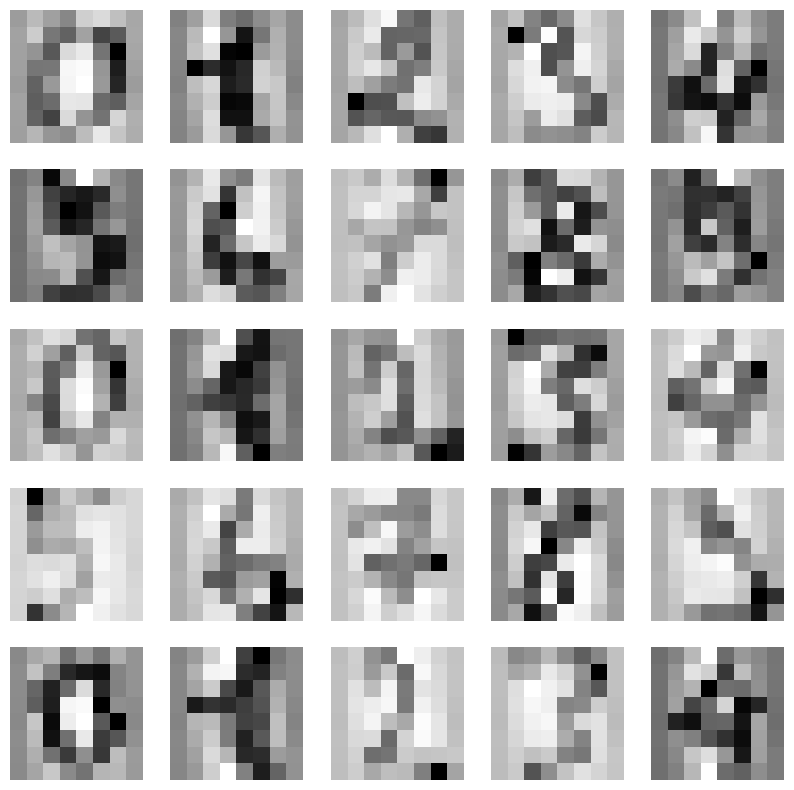

In [4]:
# Display the first 25 images...

plt.figure( figsize=(10, 10) )
 
for ii in np.arange( 25 ):
    plt.subplot( 5, 5, ii+1 )
    plt.imshow( np.reshape( X[ii,:], (8,8) ), cmap='Greys', interpolation='nearest' )
    plt.axis( 'off' )

plt.show()

# Task 1.1

In [5]:
# split the data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=1, test_size=0.8 )

In [6]:
# initialize the model
model = svm.SVC( kernel='rbf', C=5 )

In [7]:
# train the model
_ = model.fit(X_train, y_train)

In [8]:
# test accuracy and confusion matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report( y_test, y_pred))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.95      0.94      0.95       149
           2       0.94      0.94      0.94       142
           3       0.98      0.93      0.95       147
           4       1.00      0.91      0.96       152
           5       0.99      0.96      0.97       147
           6       0.99      0.99      0.99       146
           7       0.86      0.99      0.92       140
           8       0.88      0.95      0.92       133
           9       0.96     

most common mistake is confusing an 8 for a 5, which happens 13 times

array([1, 5, 0, ..., 6, 3, 2])

array([1, 5, 0, ..., 6, 3, 2])

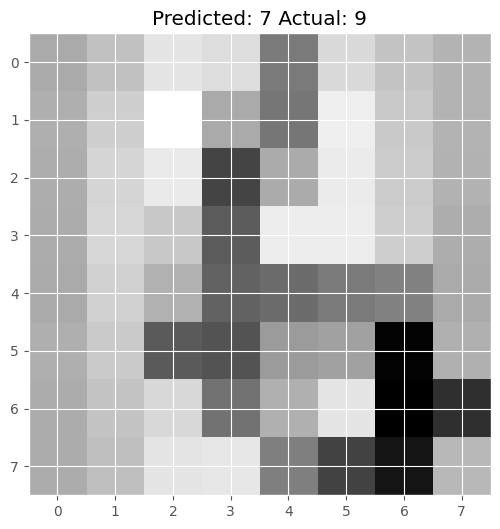

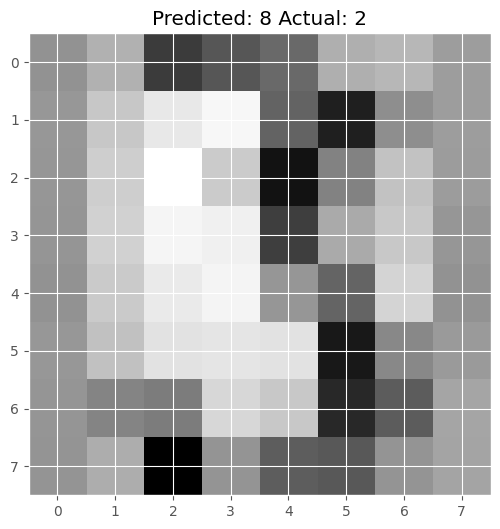

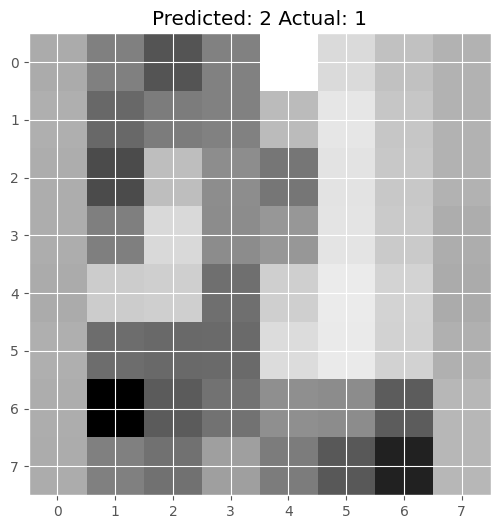

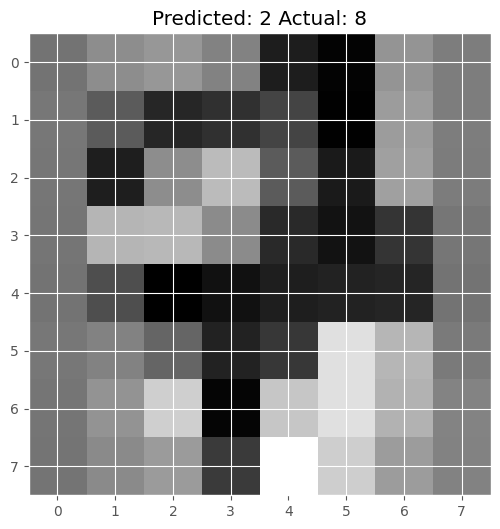

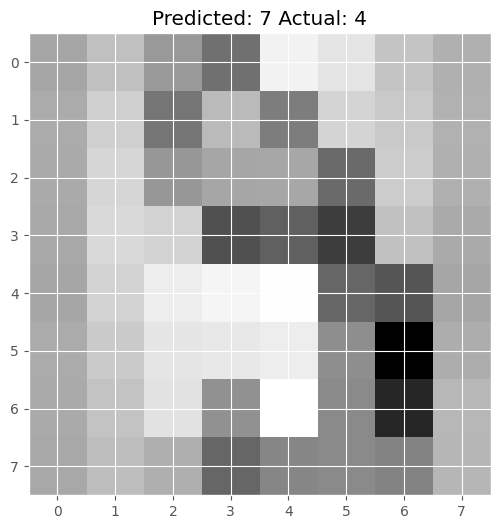

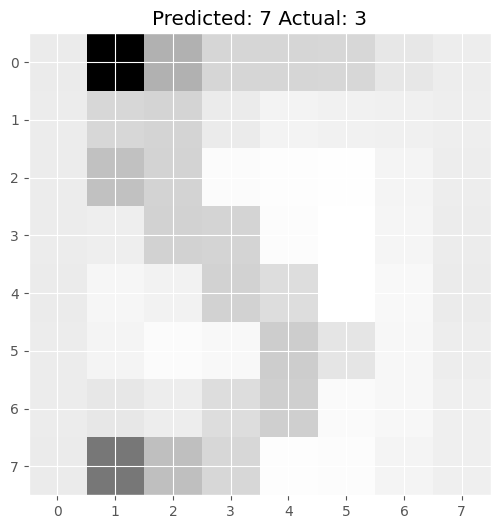

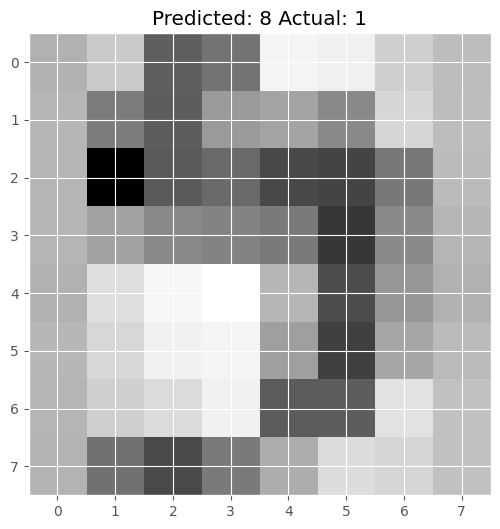

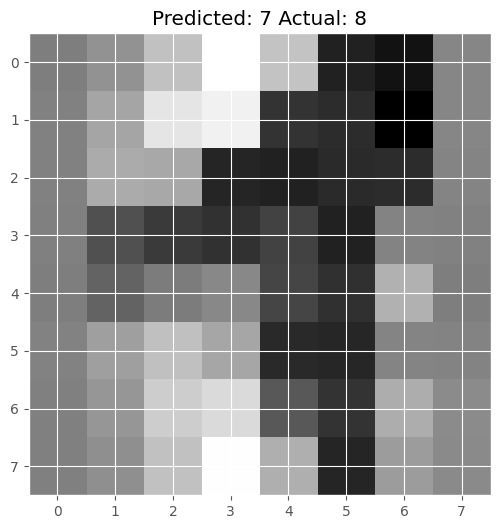

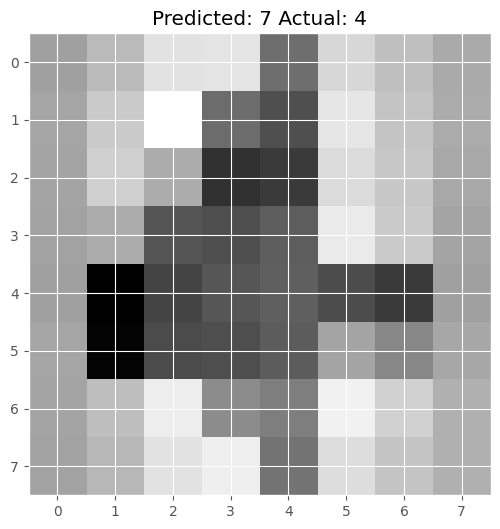

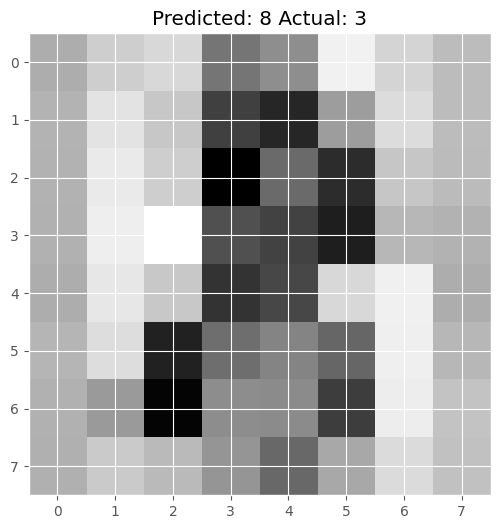

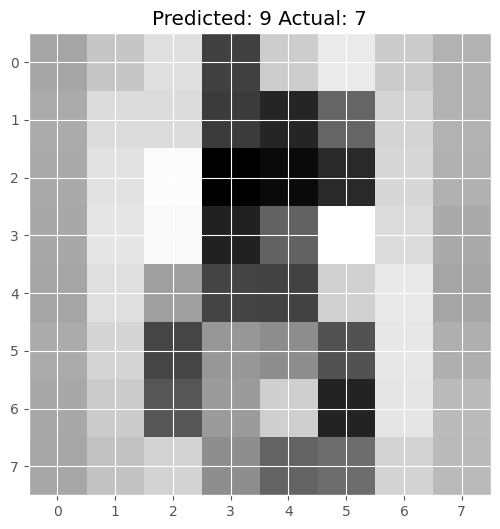

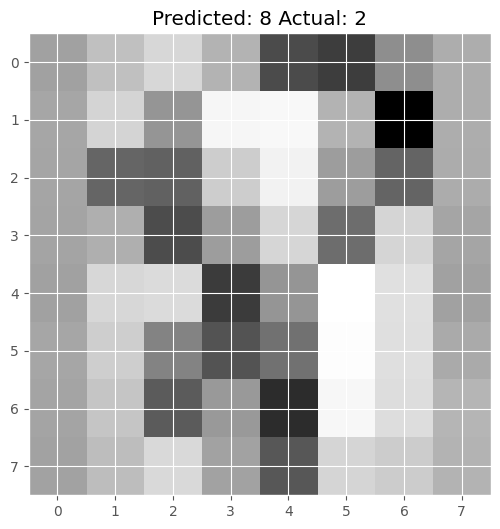

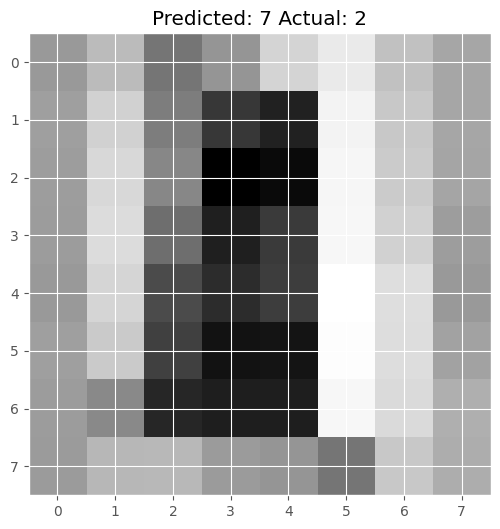

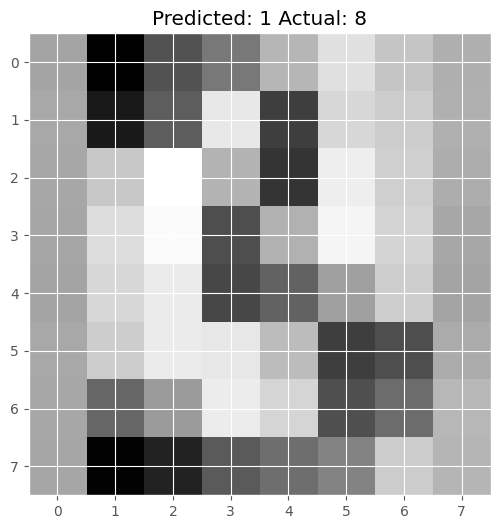

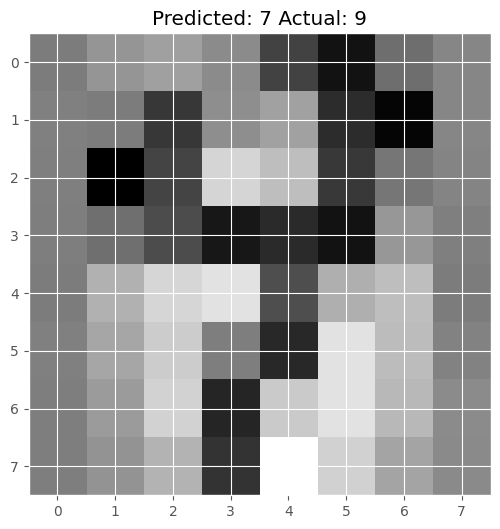

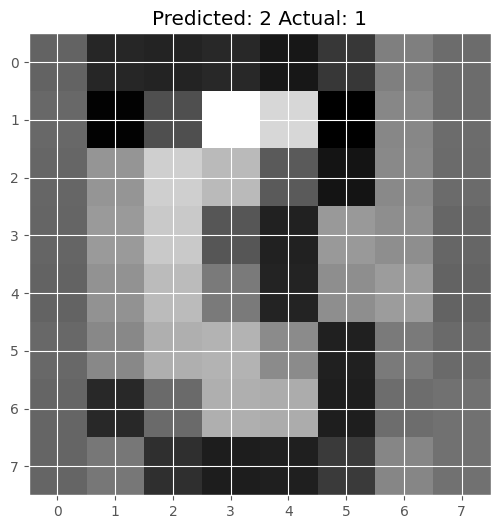

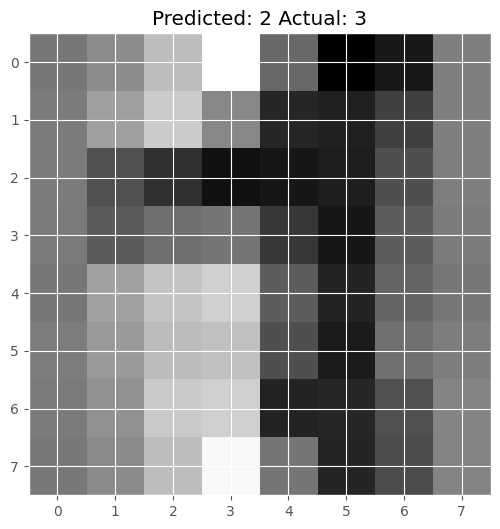

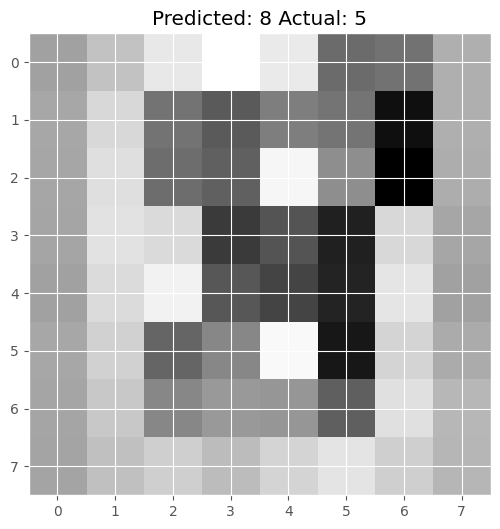

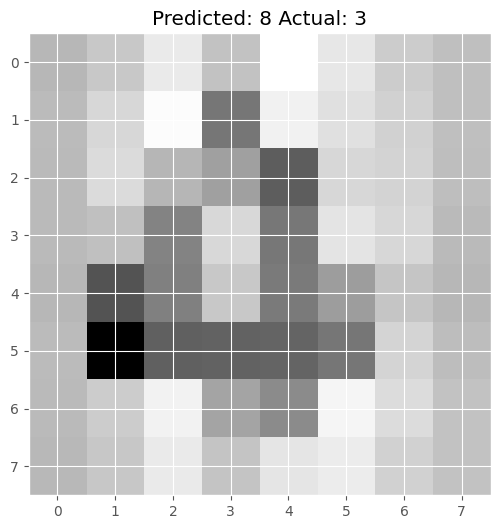

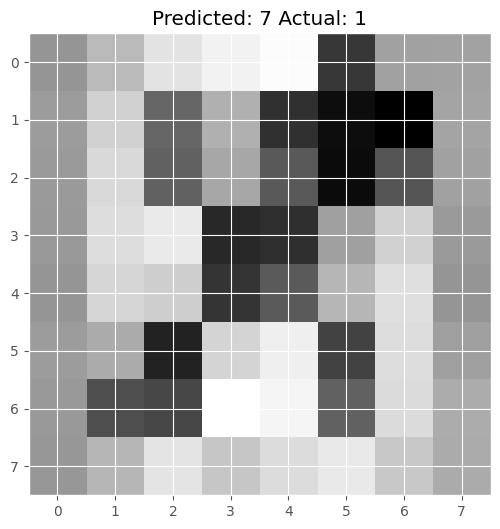

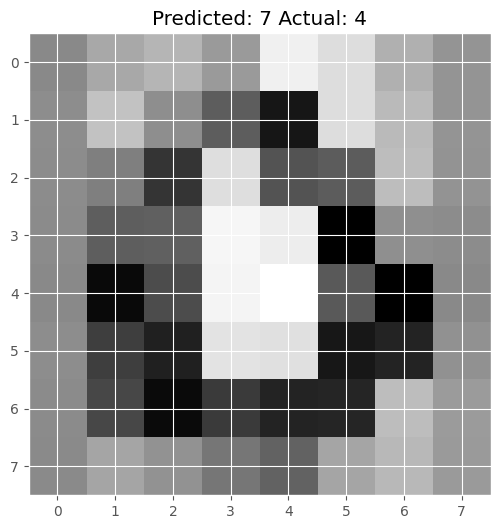

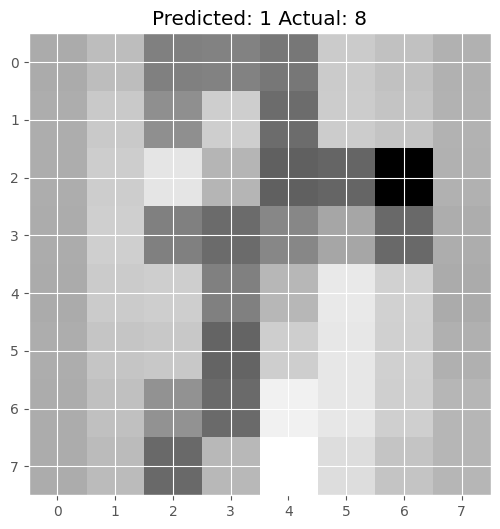

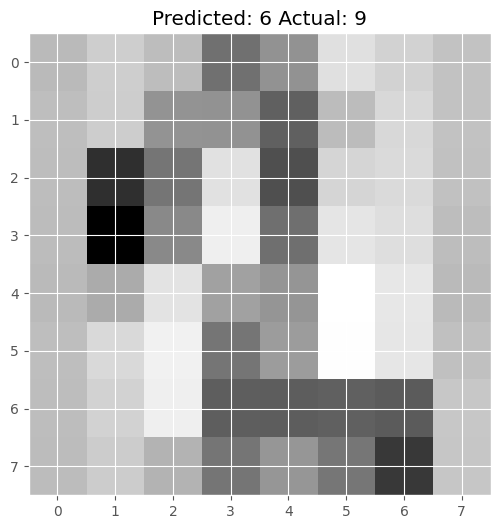

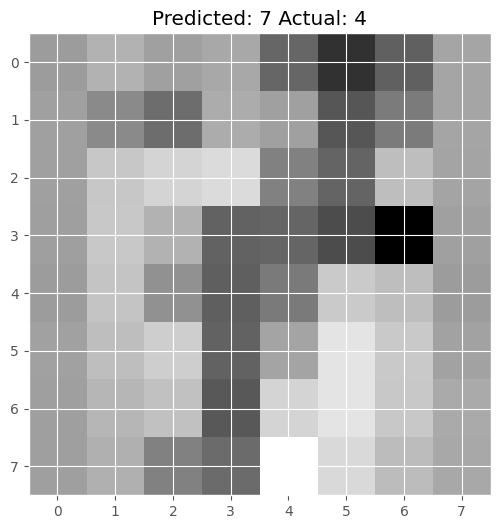

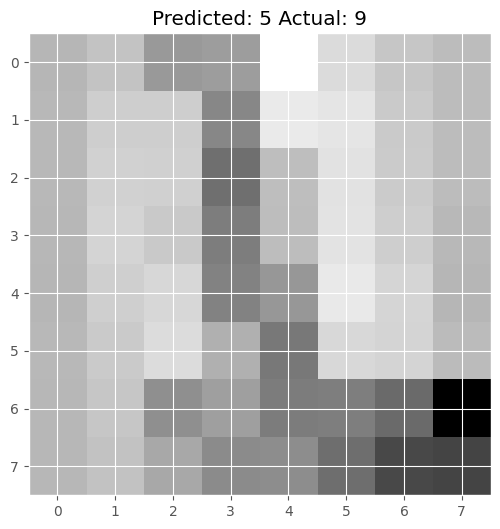

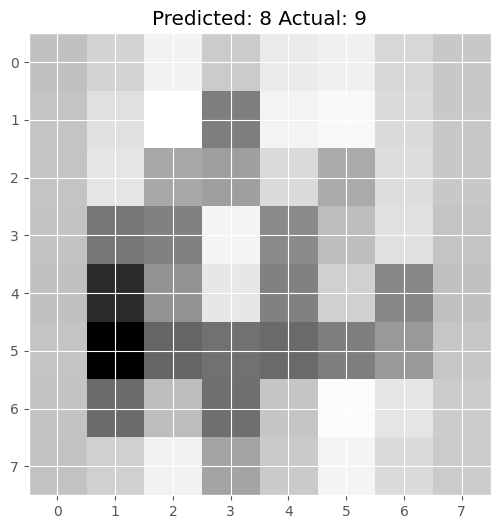

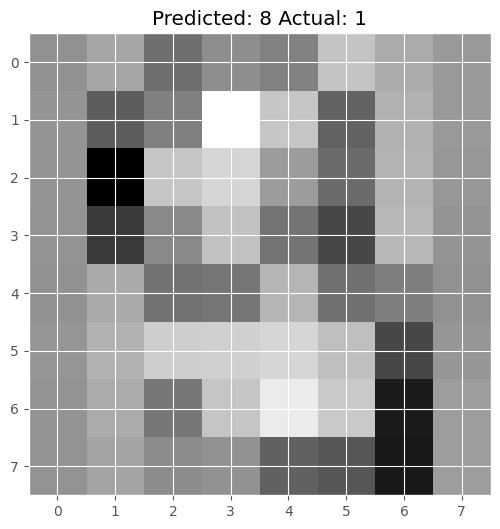

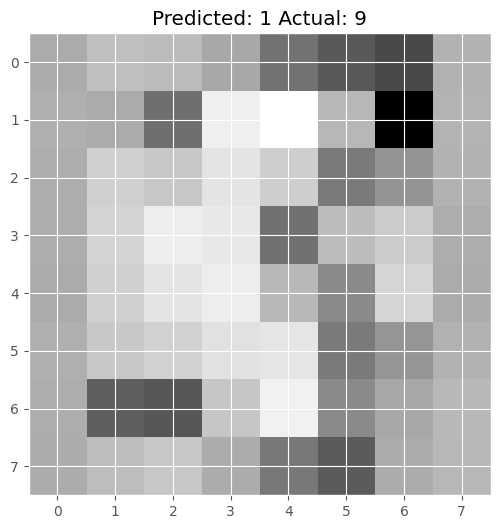

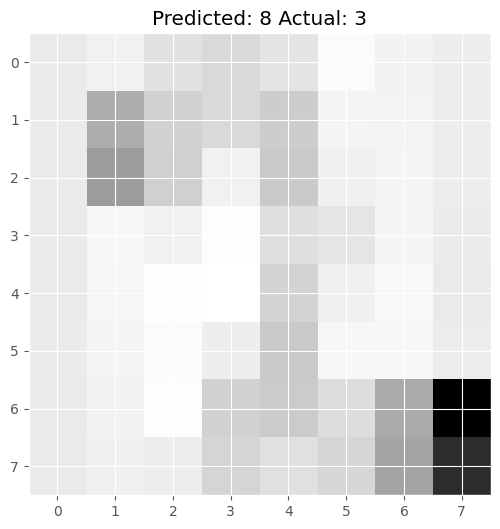

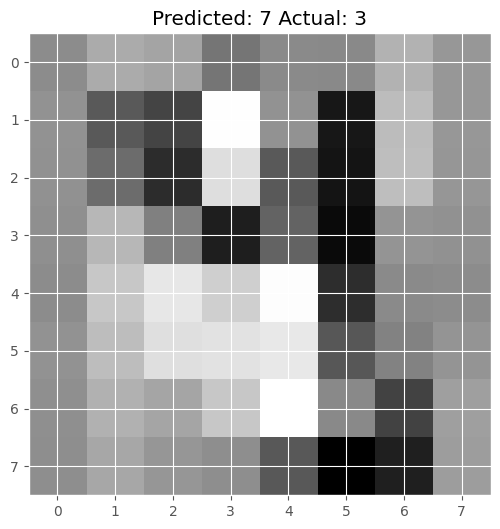

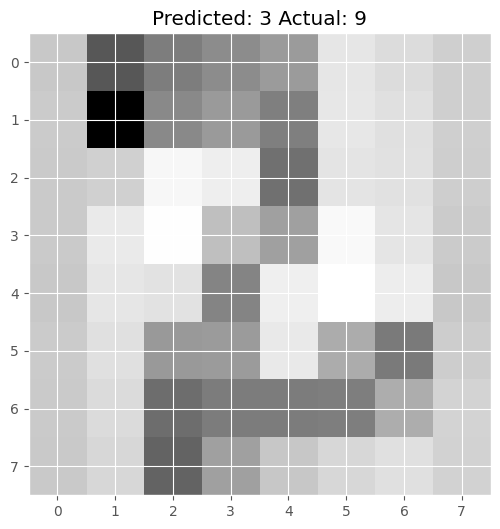

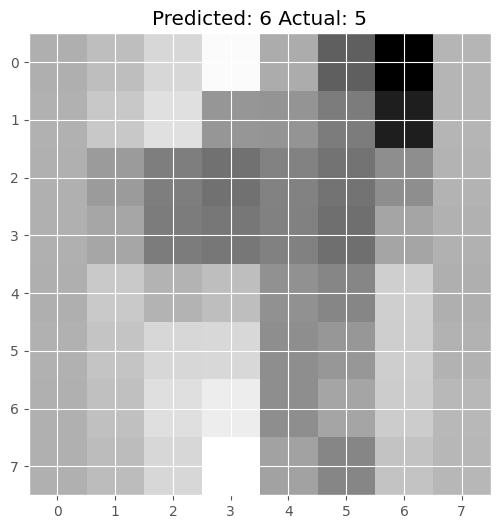

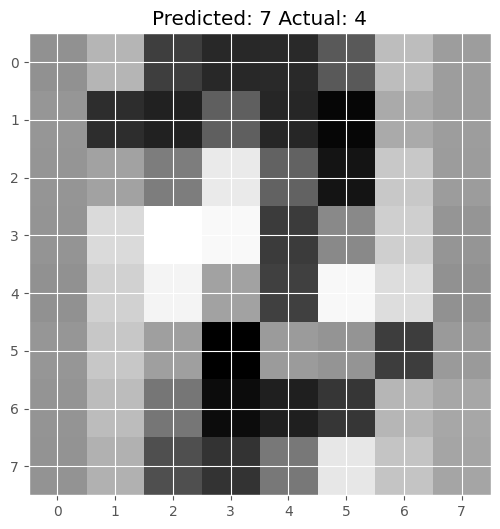

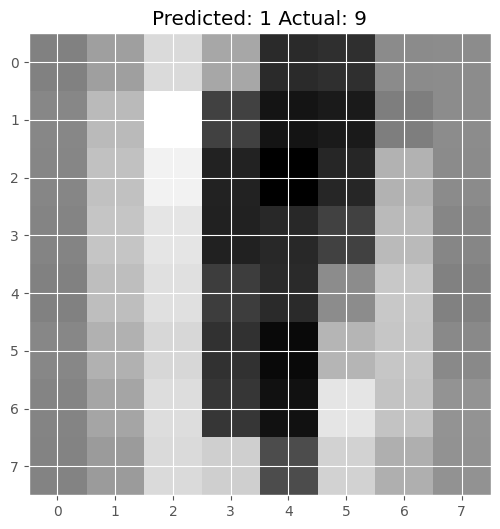

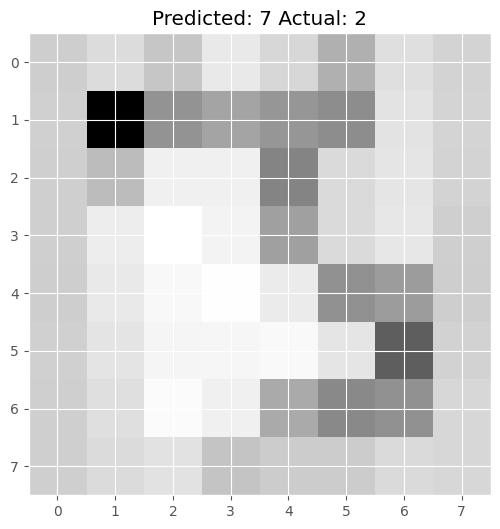

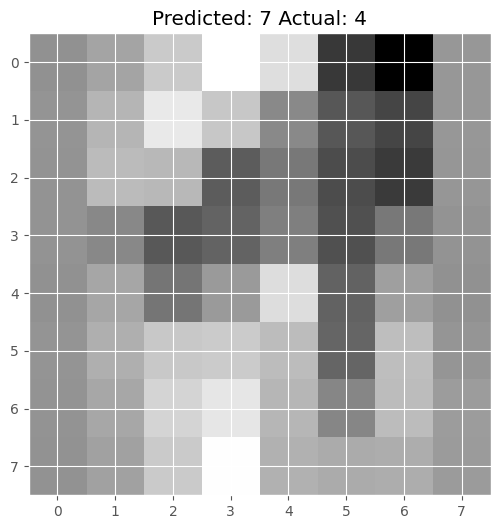

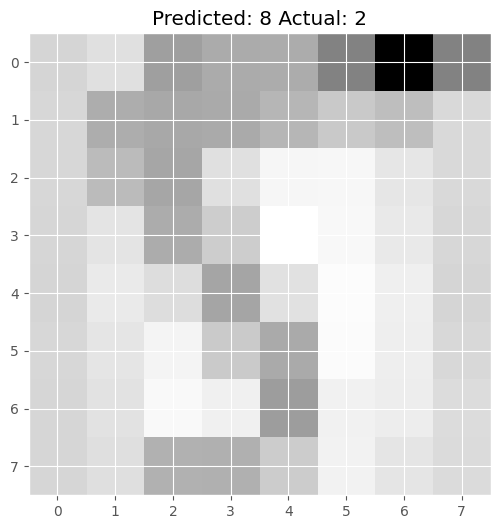

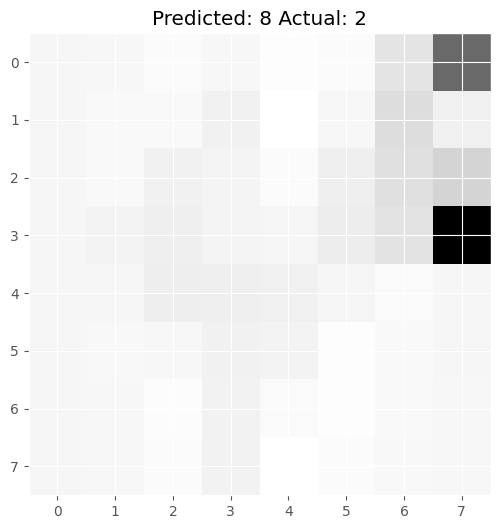

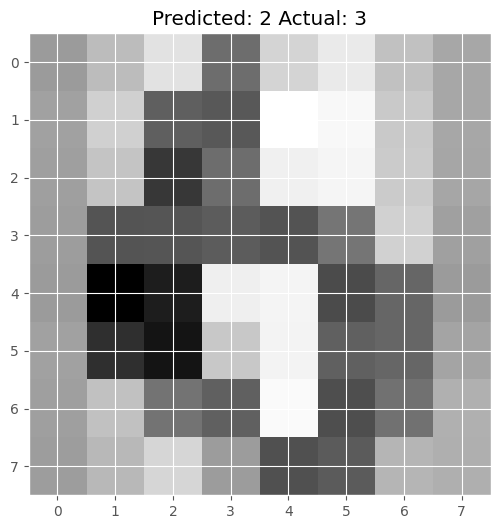

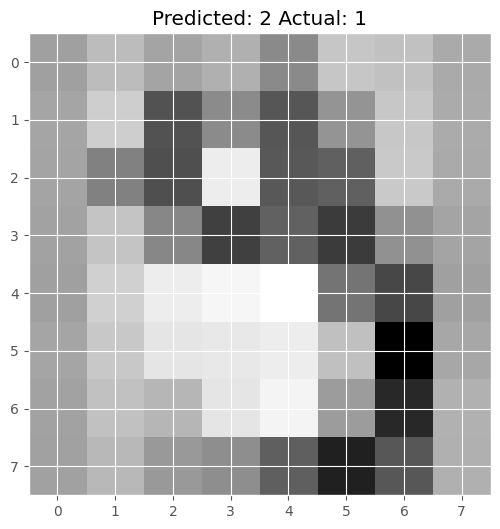

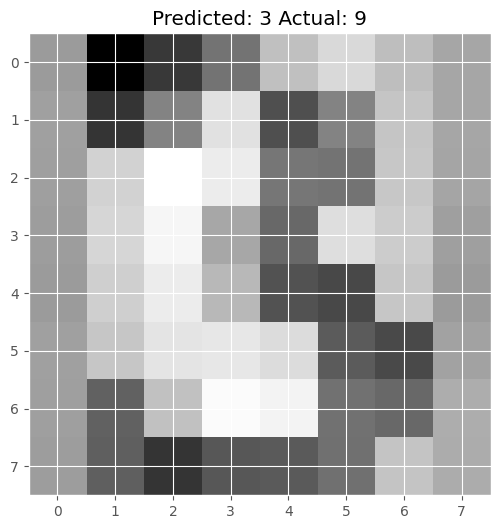

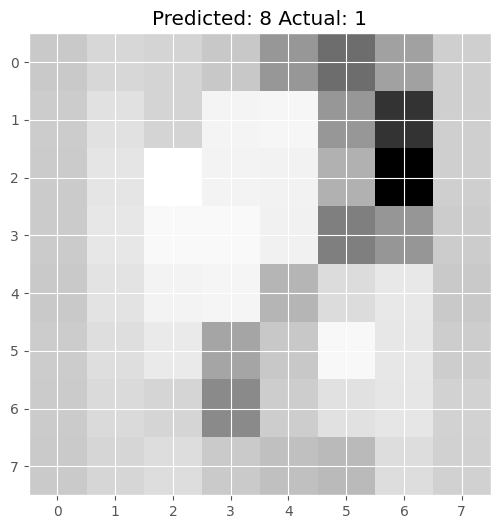

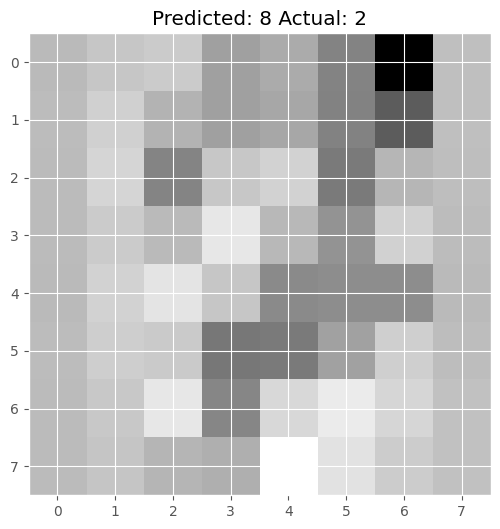

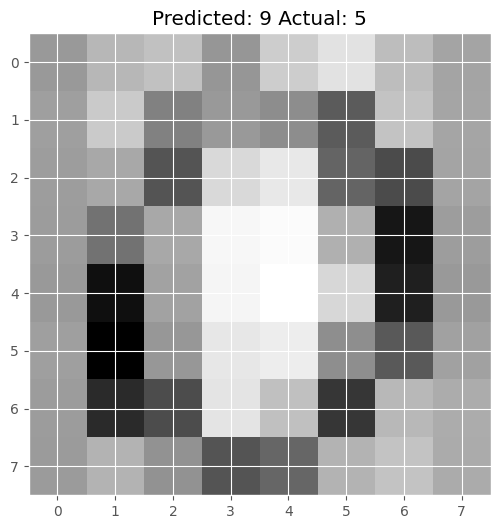

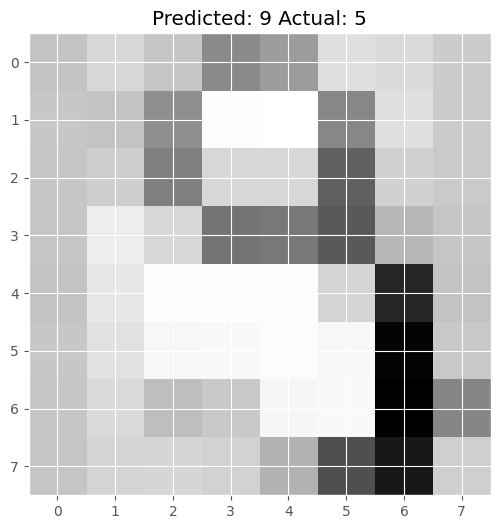

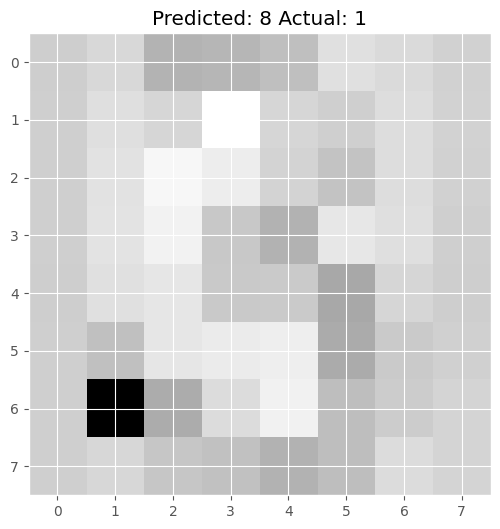

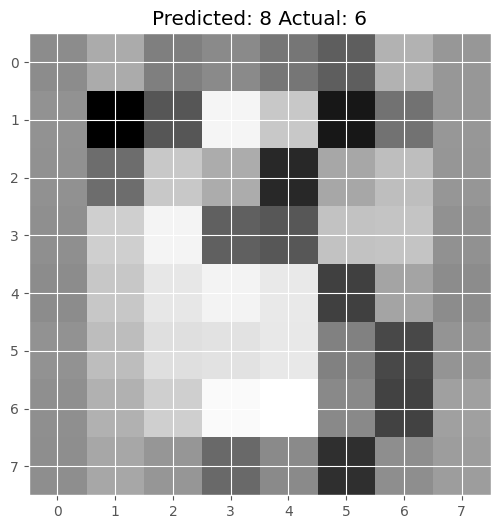

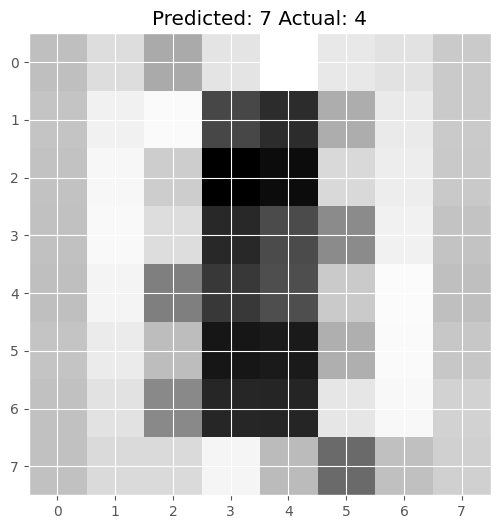

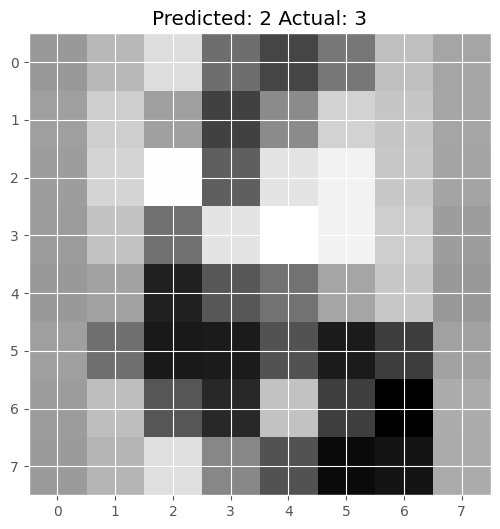

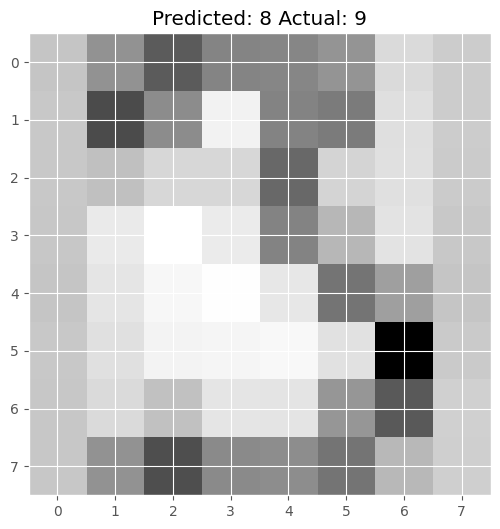

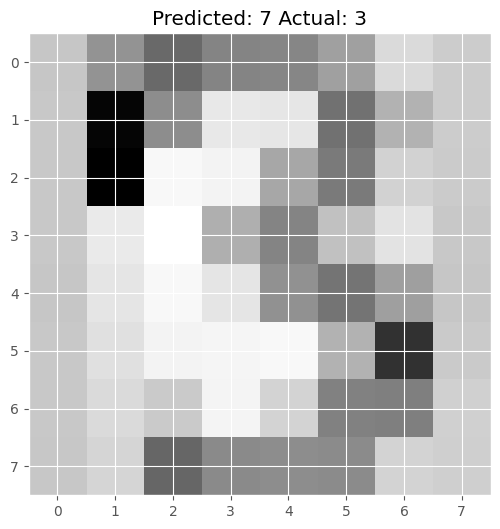

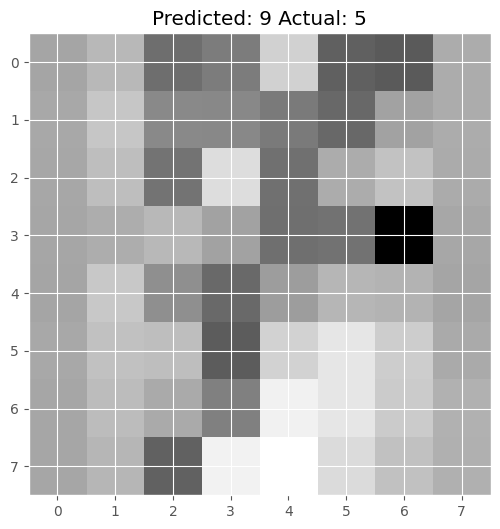

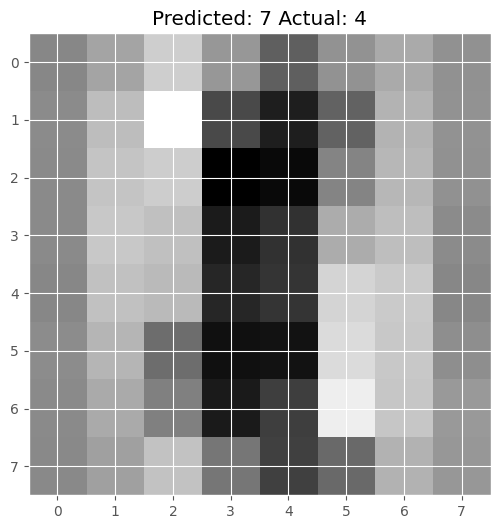

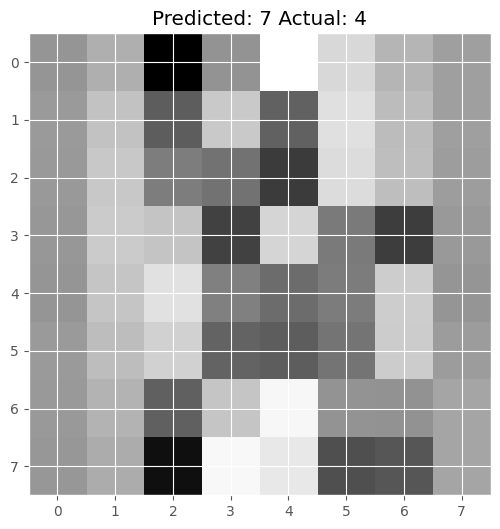

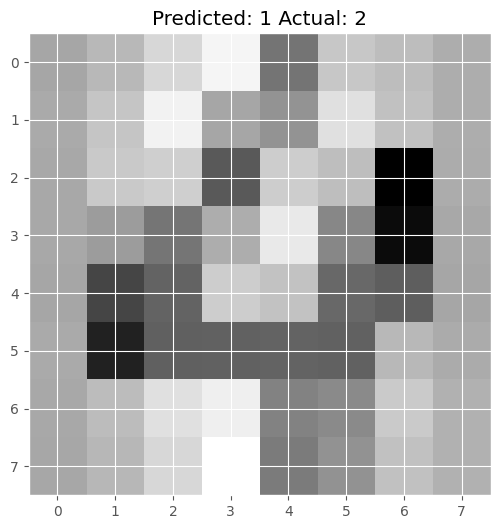

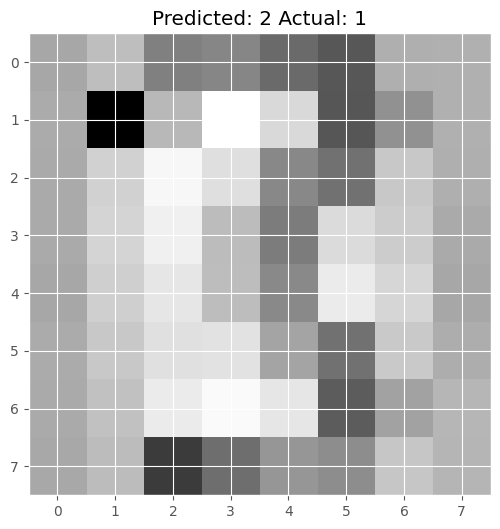

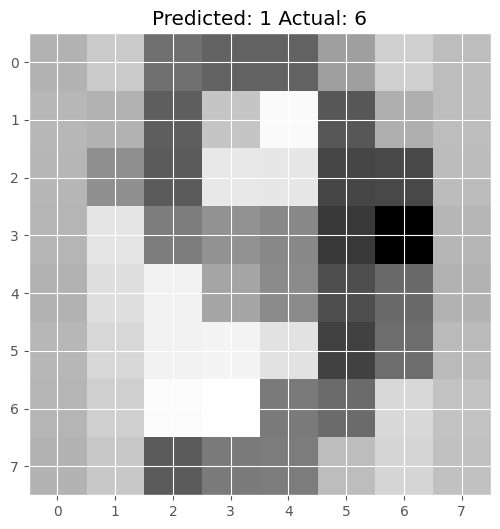

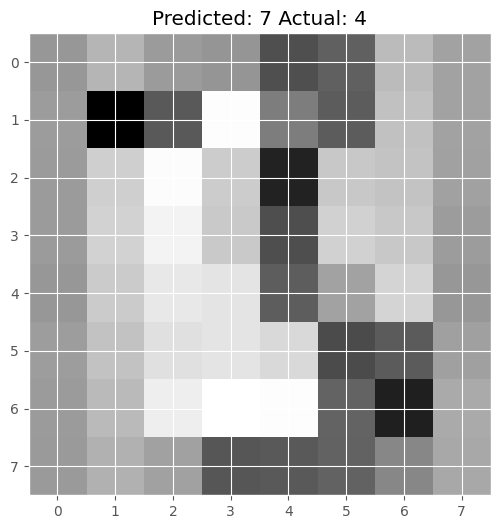

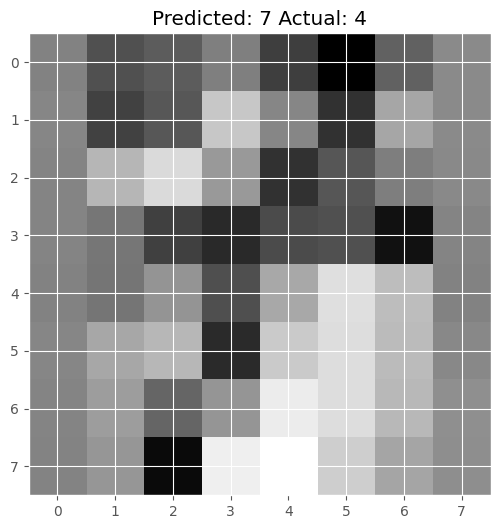

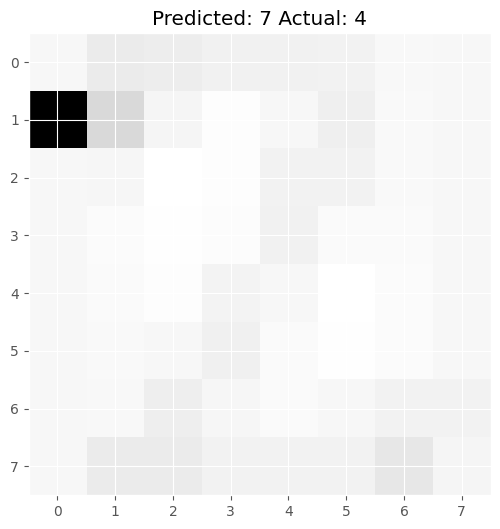

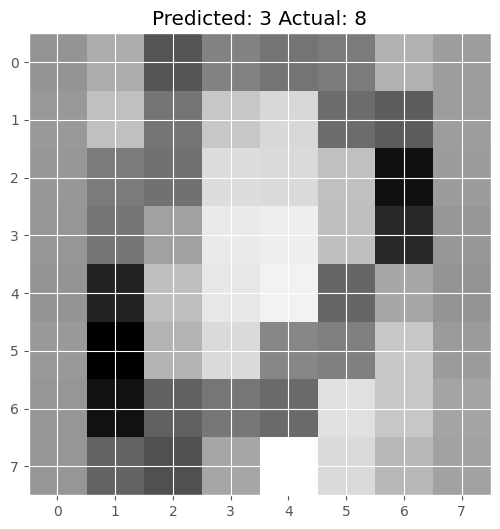

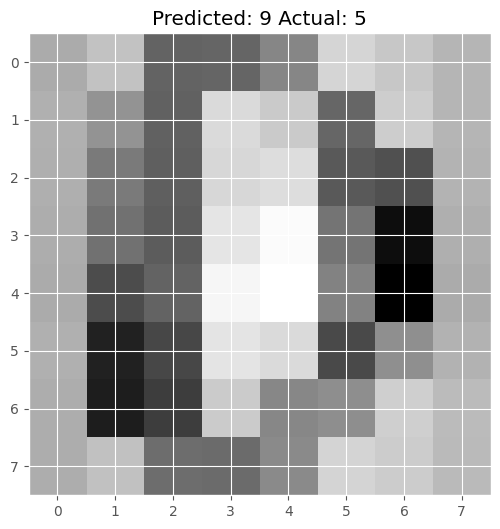

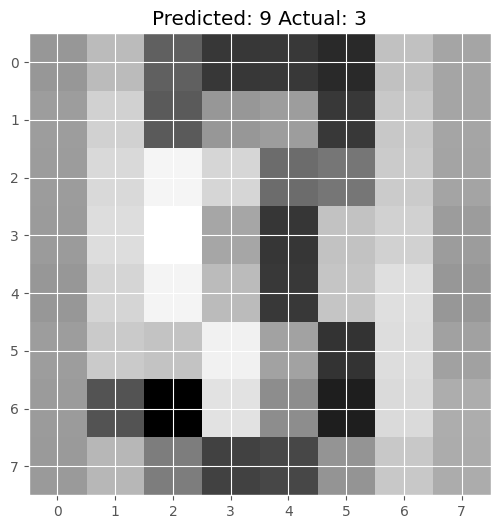

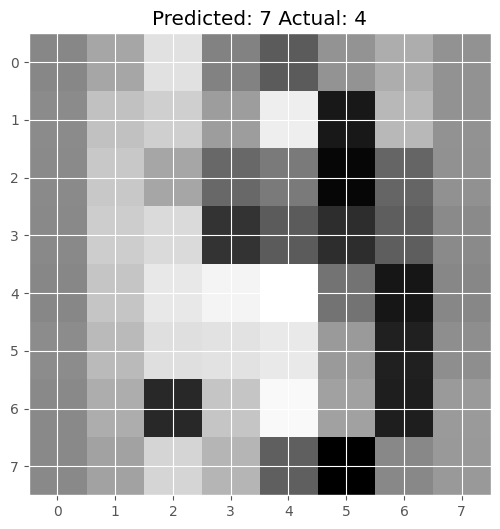

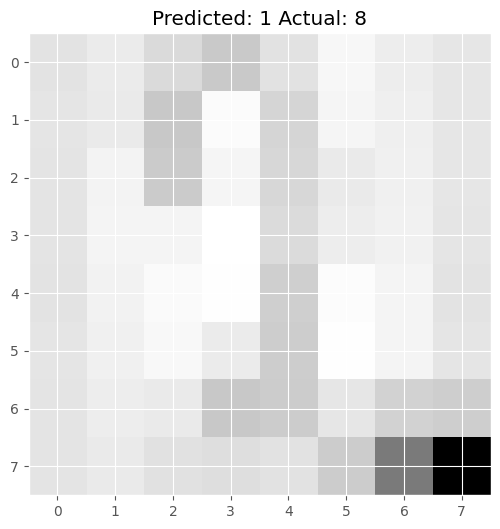

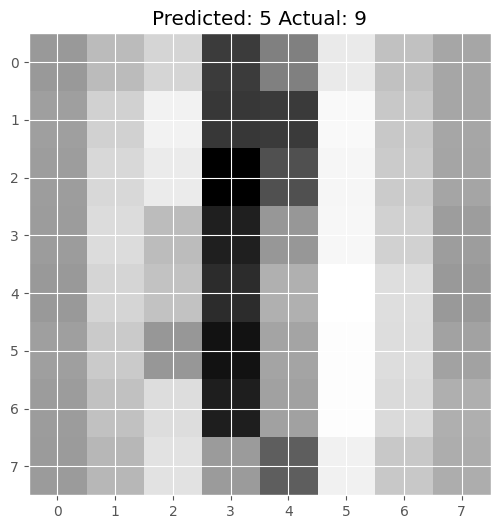

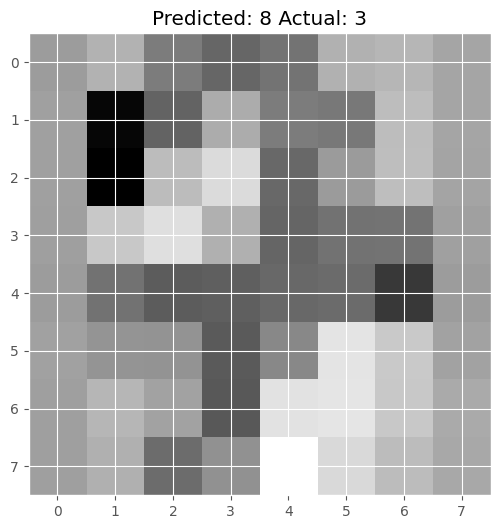

In [9]:
import math
display(model.predict(X_test))
display(y_test)

for i in range(y_pred.size):
    if y_pred[i] != y_test[i]:
        plt.imshow( np.reshape( X[i,:], (8,8) ), cmap='Greys', interpolation='nearest' )
        plt.title("Predicted: " + str(y_pred[i]) + " Actual: " + str(y_test[i]))
        plt.show()
        

In [10]:
xs = []
ys = []
for c in range(int(.5*10), int(5*10), int(.1*10)):
    model = svm.SVC( kernel='rbf', C=float(c)/10 )
    _ = model.fit(X_train, y_train)
    ys.append(cross_val_score(model, X, y, cv = 3).mean())
    xs.append( c/10)

for c in range(10, 50, 20):
    model = svm.SVC( kernel='rbf', C=c )
    _ = model.fit(X_train, y_train)
    ys.append(cross_val_score(model, X, y, cv = 3).mean())
    xs.append(c)

Text(0, 0.5, 'CV score')

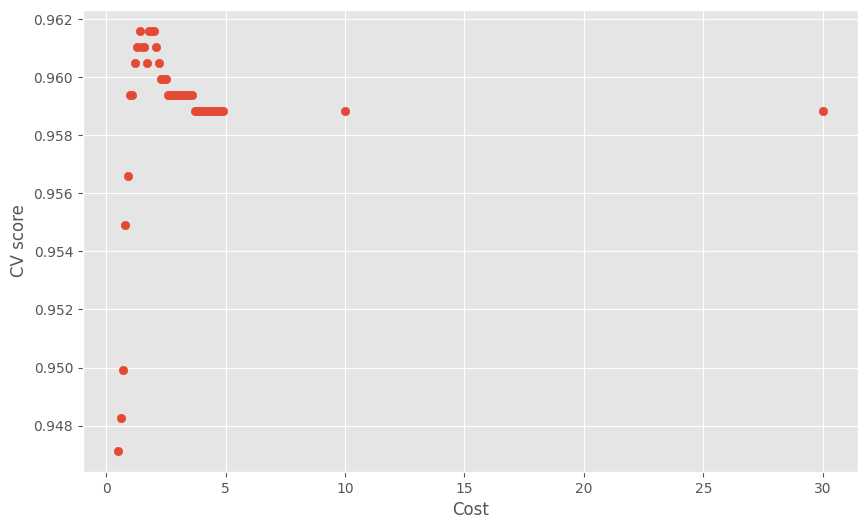

In [11]:
plt.scatter(xs, ys)
plt.xlabel("Cost")
plt.ylabel("CV score")

In [12]:
print(max(ys))
print(xs[ys.index(max(ys))])

0.9616026711185309
1.4


the best model seams to be at about c = 1.4 with a cv score of about .9616

In [13]:
model = svm.SVC( kernel='rbf', C=5 )
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=1, test_size=0.8 )
_ = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report( y_test, y_pred))

[[129   0   0   0   1   0   0   0   0   0]
 [  0 144   0   0   0   0   0   0   5   0]
 [  0   0 141   0   0   0   0   0   1   0]
 [  0   0   0 140   0   1   0   2   3   1]
 [  0   0   0   0 152   0   0   0   0   0]
 [  0   0   0   0   0 143   1   0   0   3]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   0   0   0   0   0   0 129   1]
 [  0   1   0   4   0   1   0   1   3 142]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       130
           1       0.97      0.97      0.97       149
           2       1.00      0.99      1.00       142
           3       0.97      0.95      0.96       147
           4       0.99      1.00      1.00       152
           5       0.99      0.97      0.98       147
           6       0.99      0.99      0.99       146
           7       0.98      0.99      0.99       140
           8       0.91      0.97      0.94       133
           9       0.96     

accuracy goes up from 95% to 98%

# Task 1.2

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=1, test_size=0.8 )
model = KNeighborsClassifier(n_neighbors = 10)
_ = model.fit(X_train, y_train)

In [15]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report( y_test, y_pred))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       130
           1       0.84      0.92      0.88       149
           2       0.90      0.87      0.88       142
           3       0.90      0.90      0.90       147
           4       0.99      0.97      0.98       152
           5       0.97      0.93      0.95       147
           6       0.98      0.98      0.98       146
           7       0.86      0.99      0.92       140
           8       0.82      0.86      0.84       133
           9       0.94     

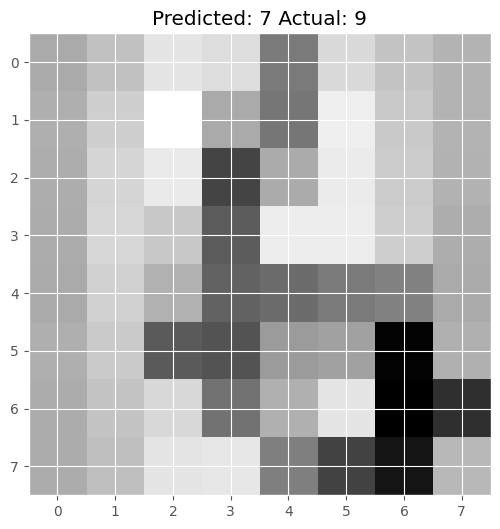

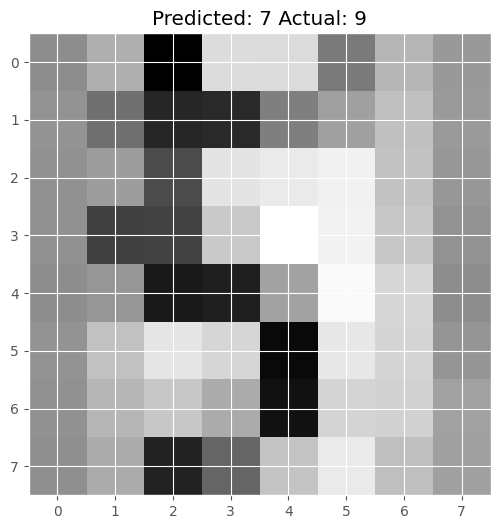

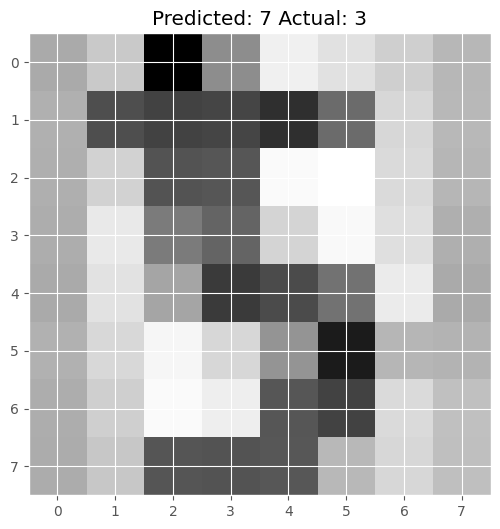

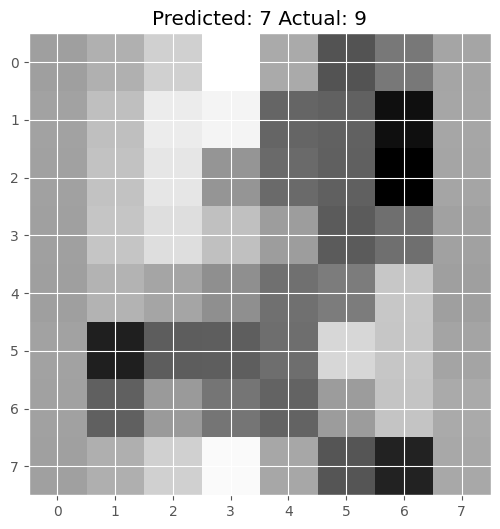

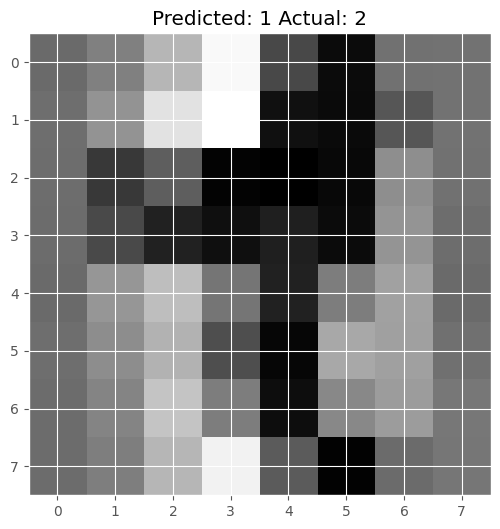

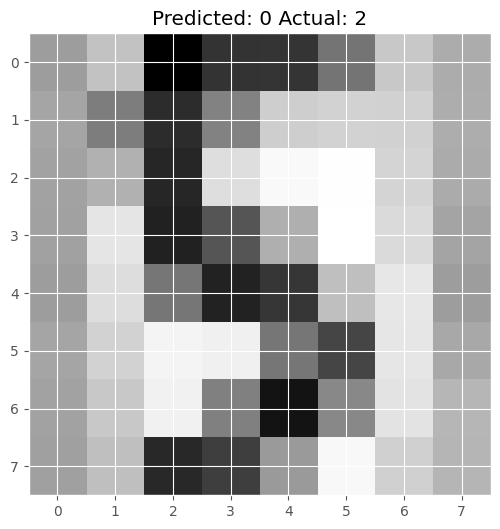

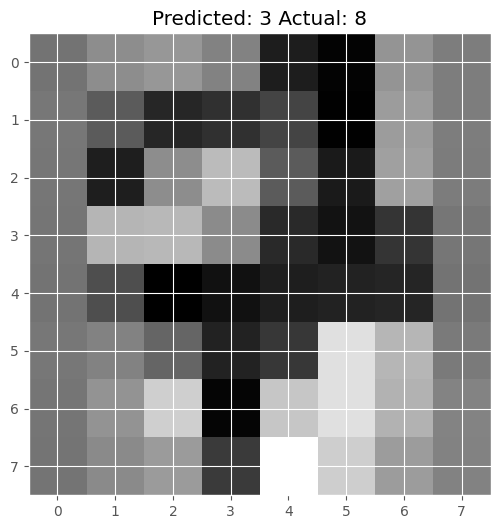

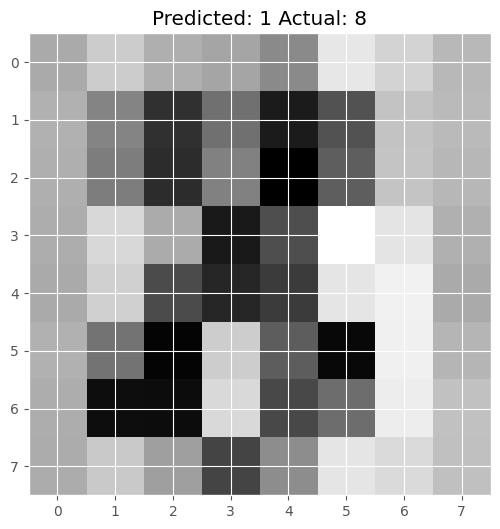

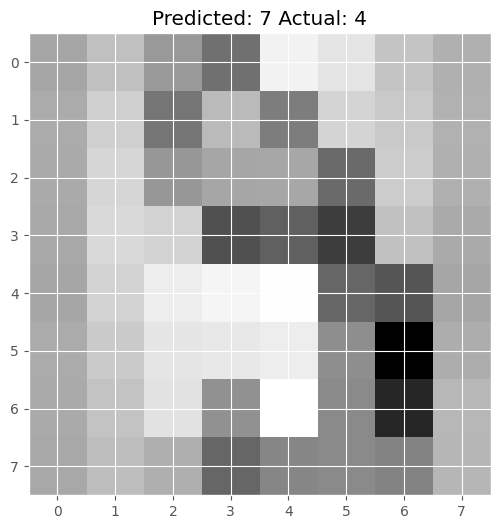

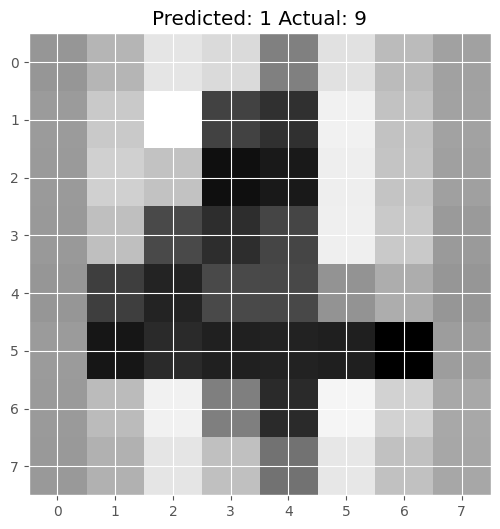

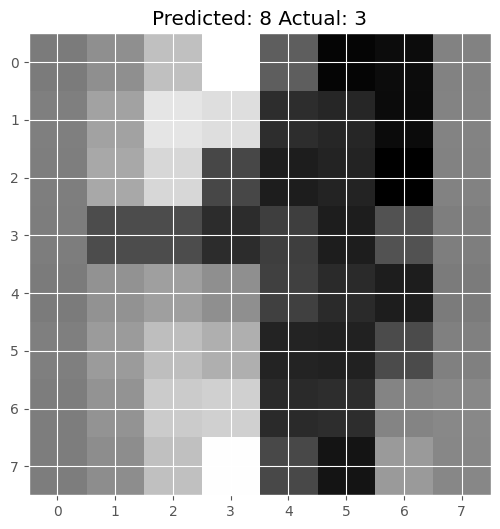

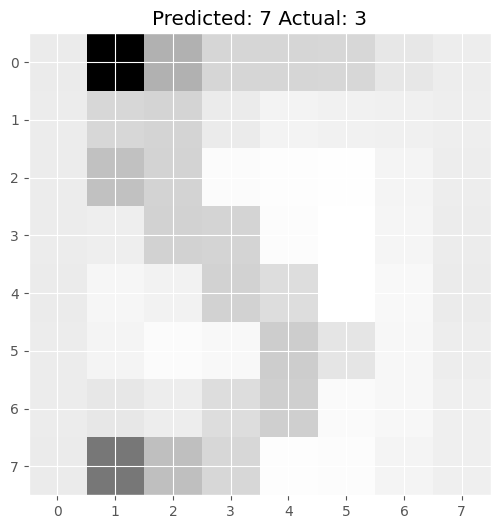

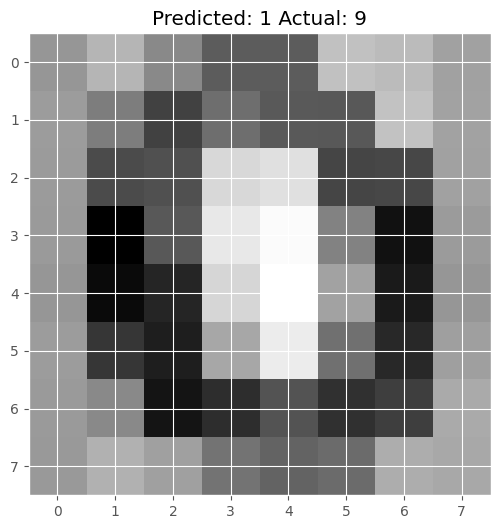

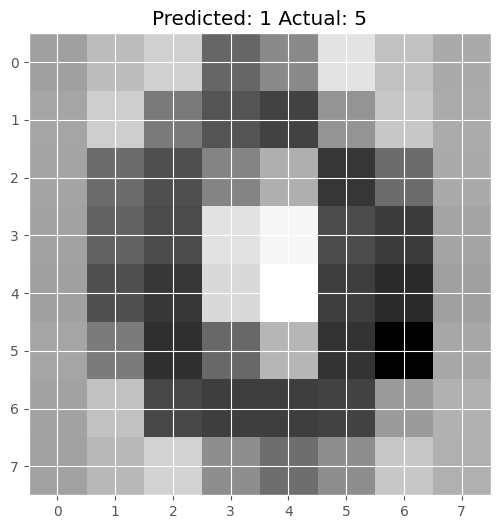

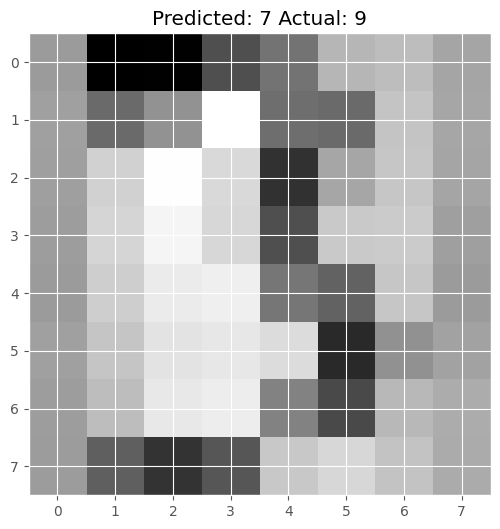

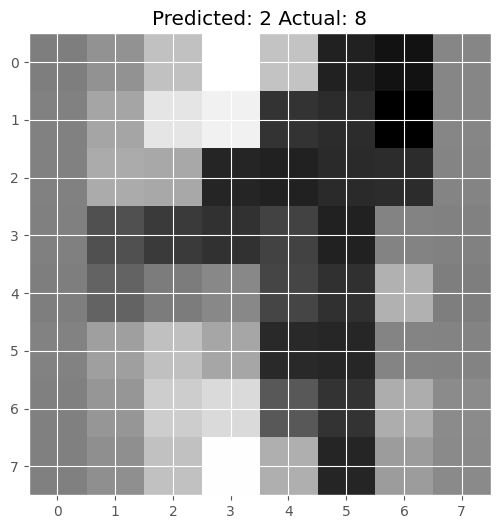

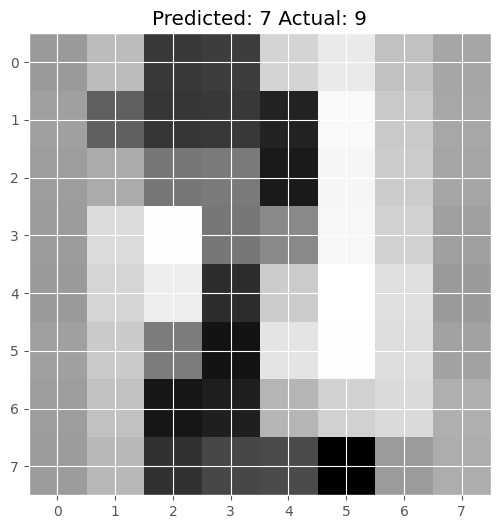

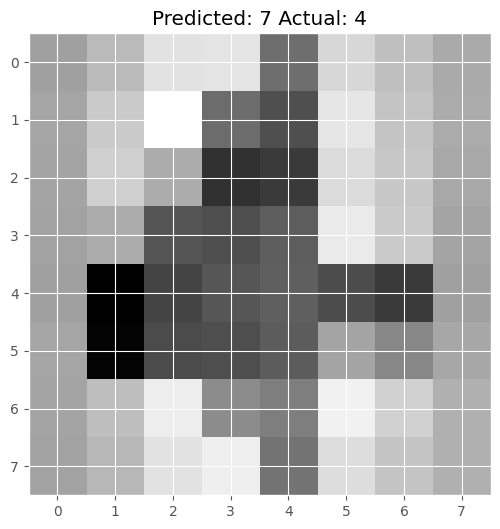

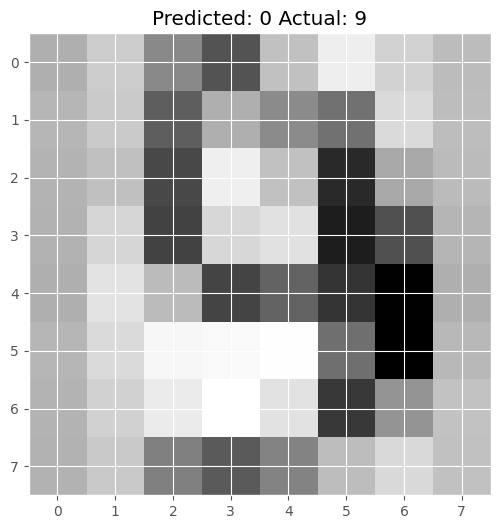

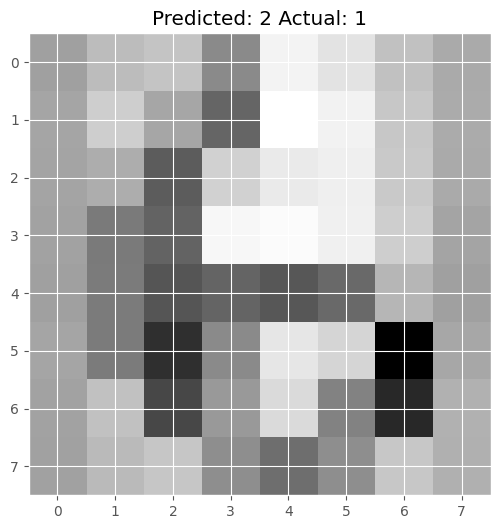

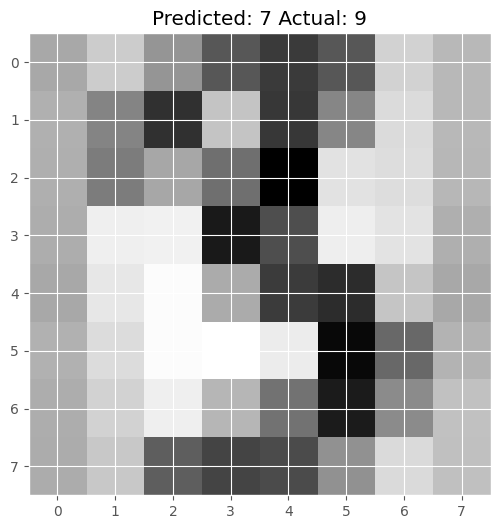

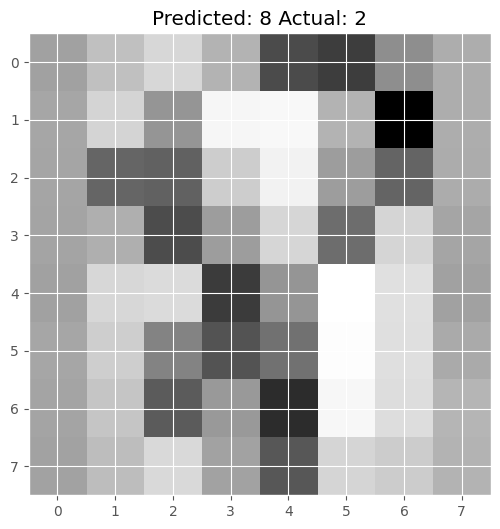

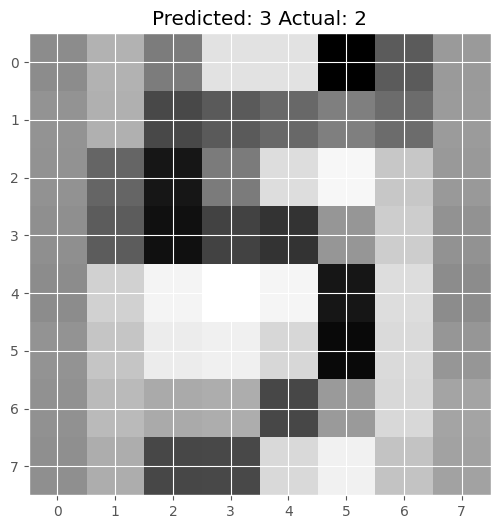

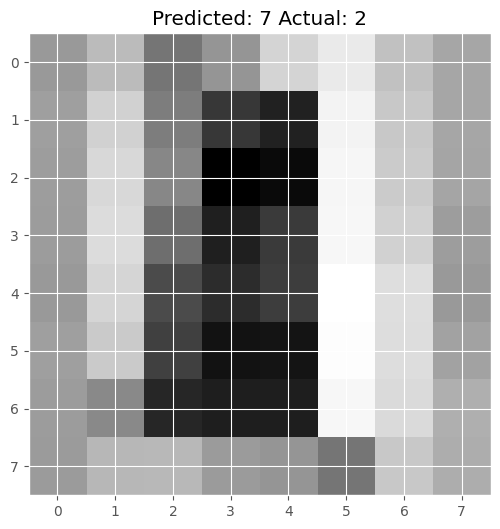

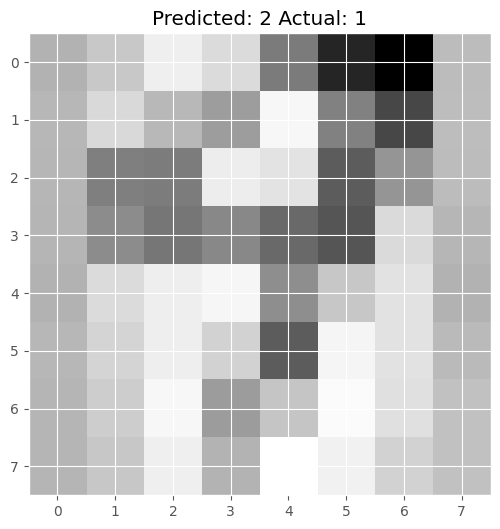

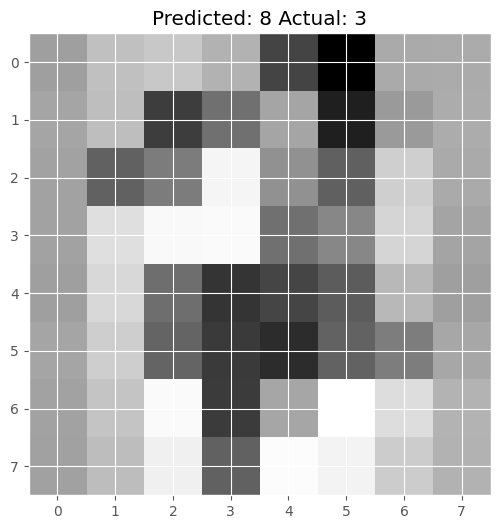

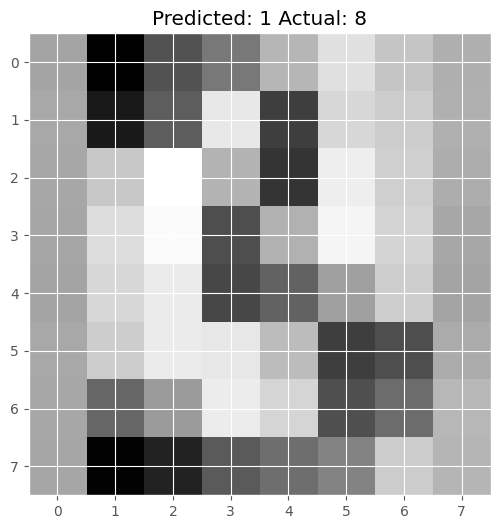

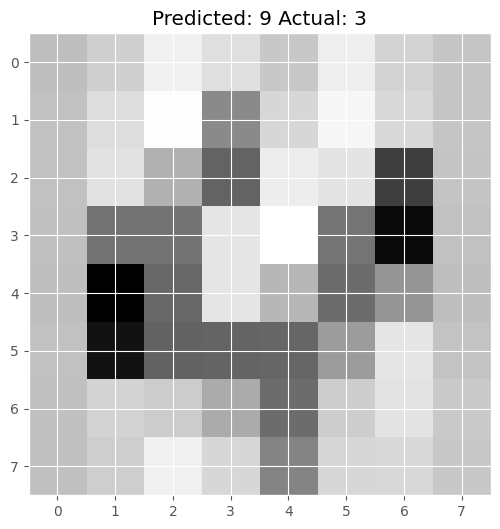

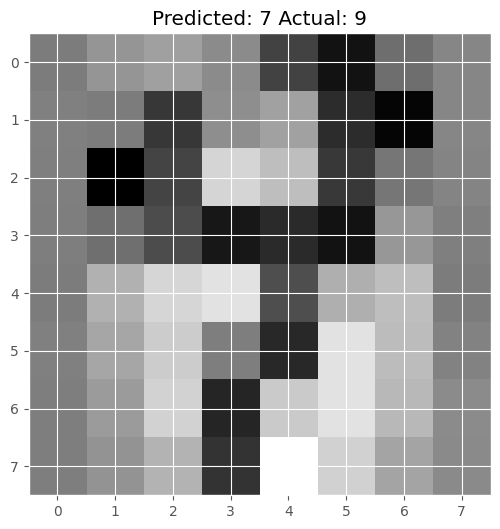

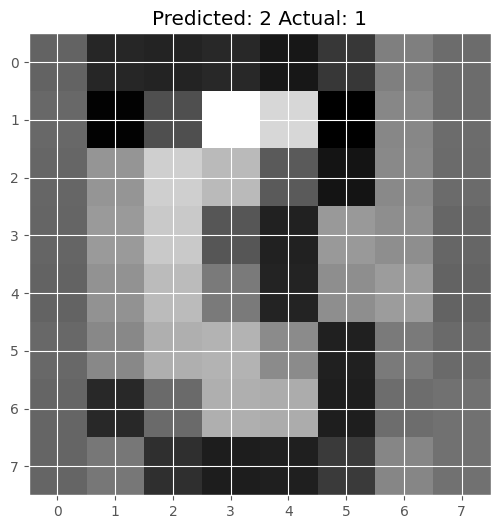

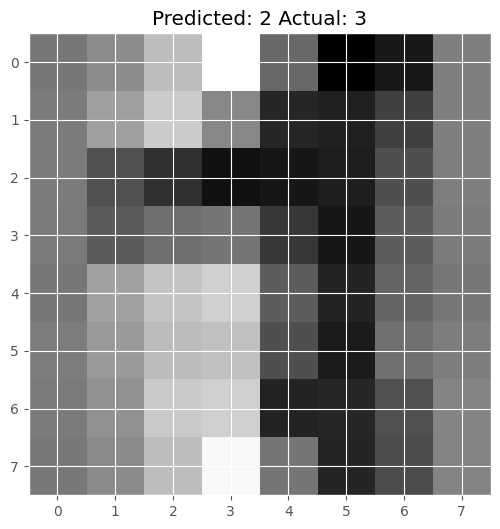

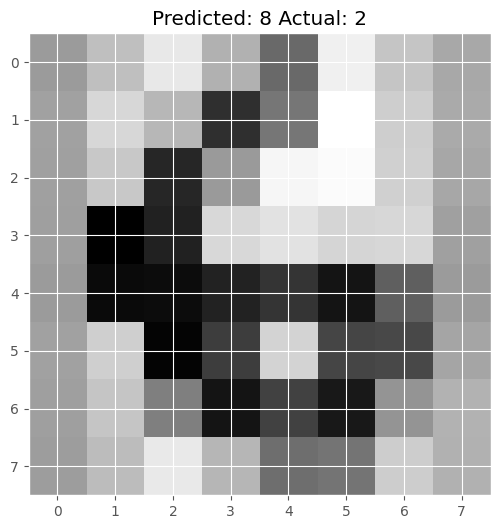

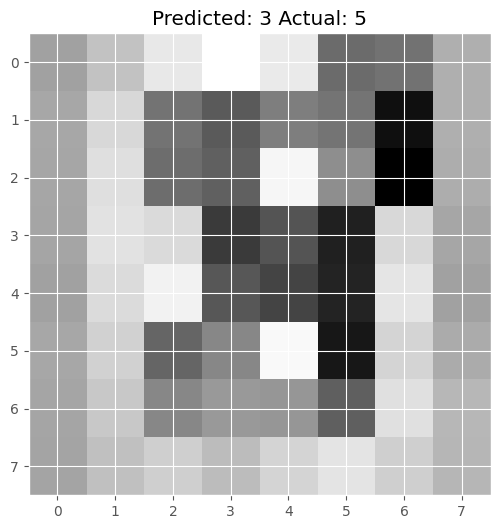

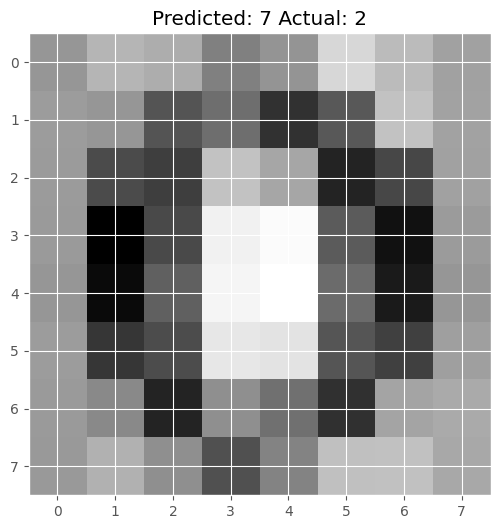

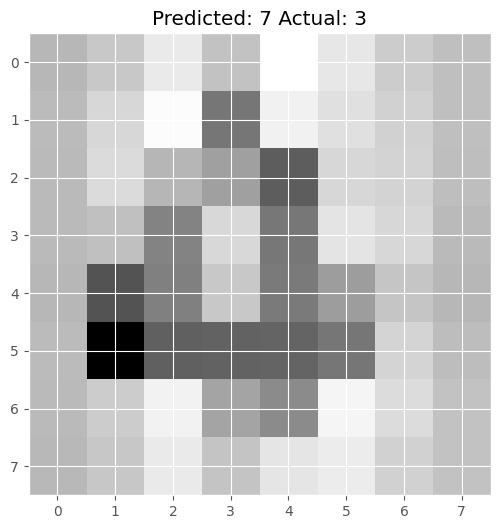

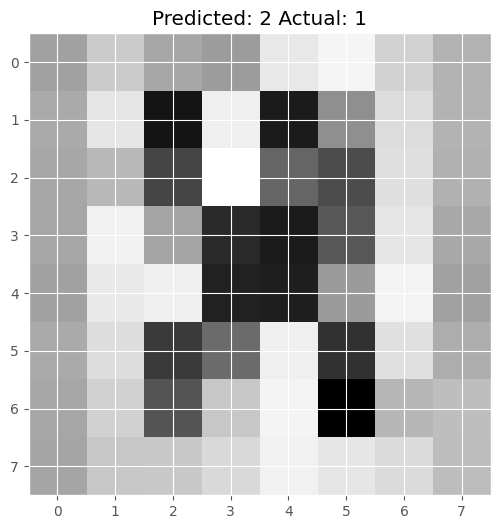

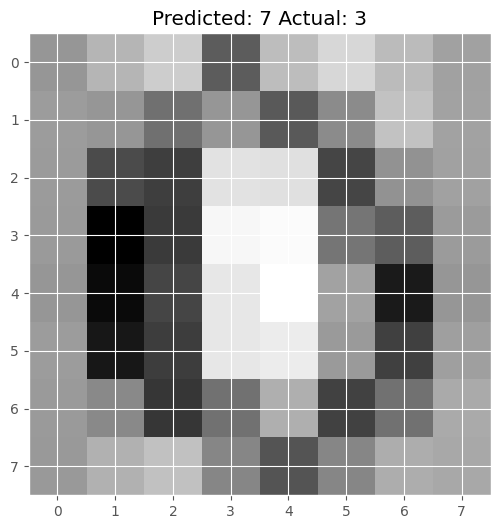

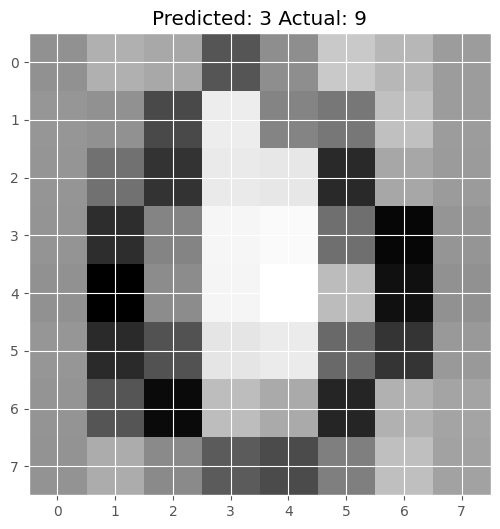

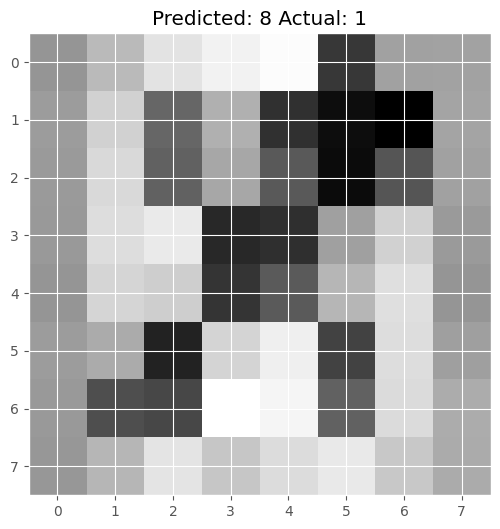

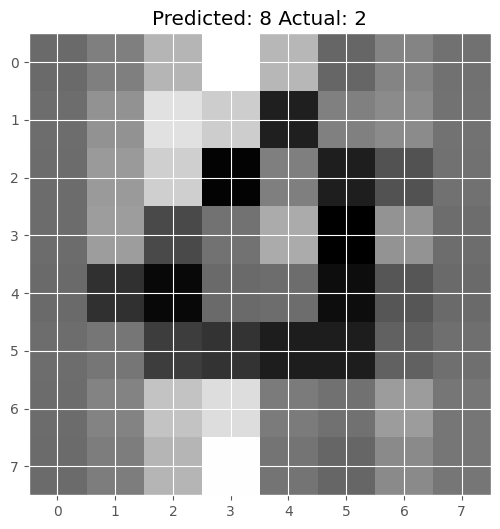

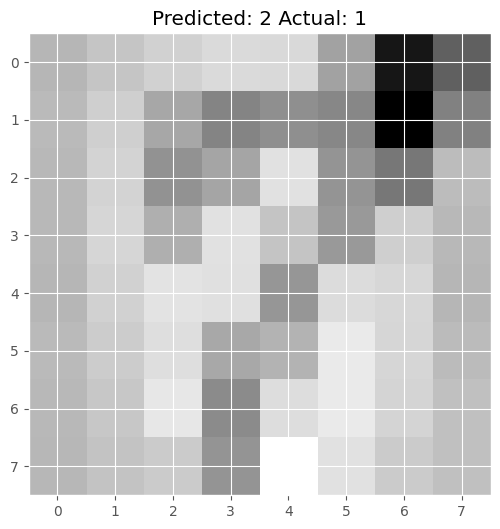

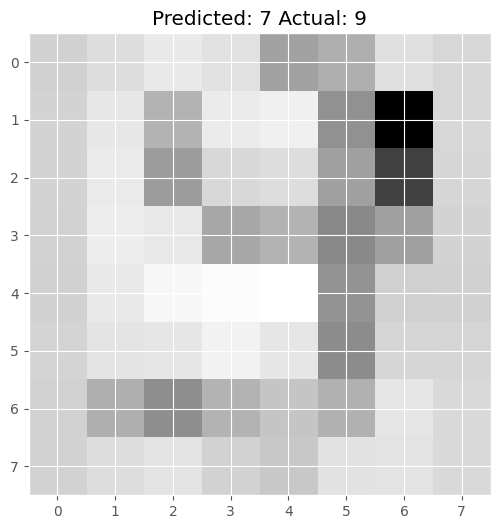

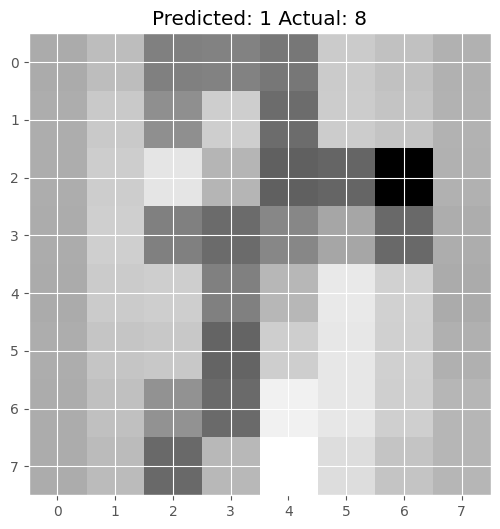

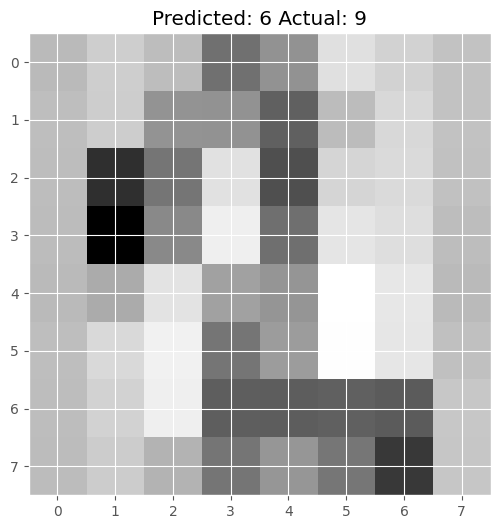

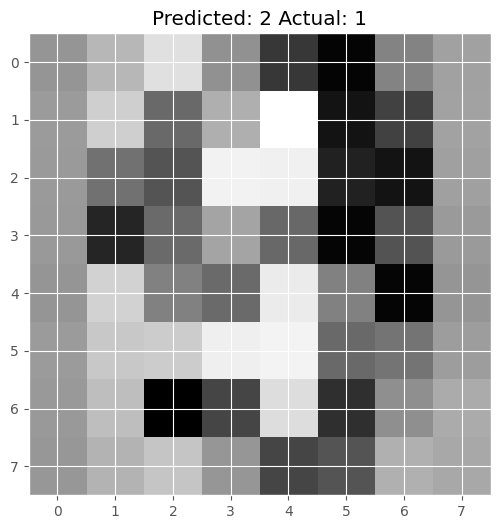

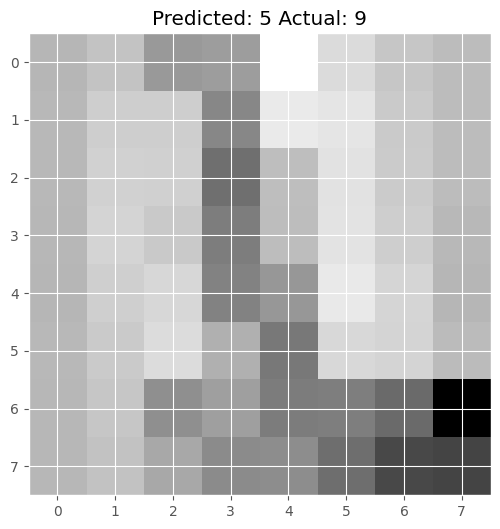

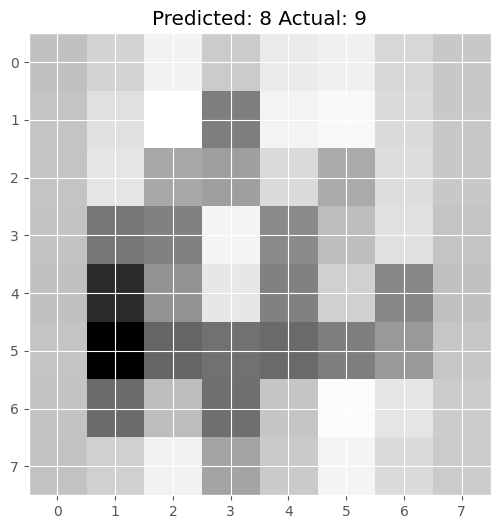

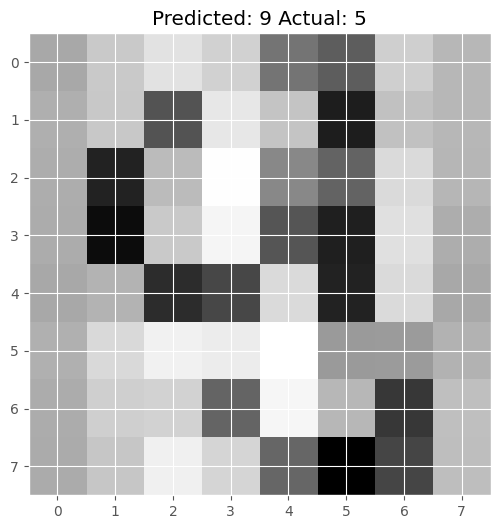

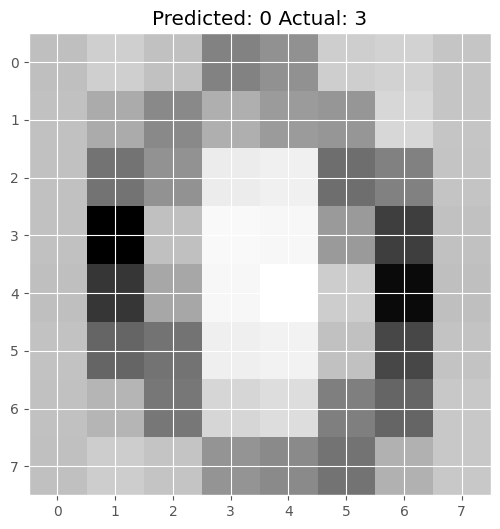

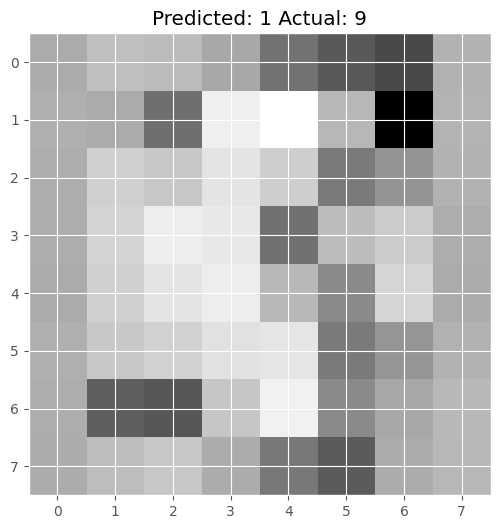

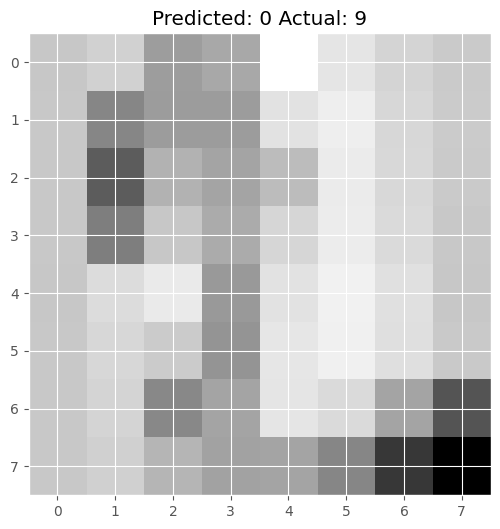

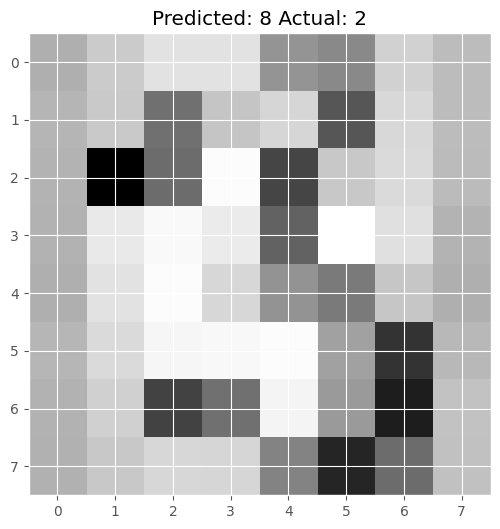

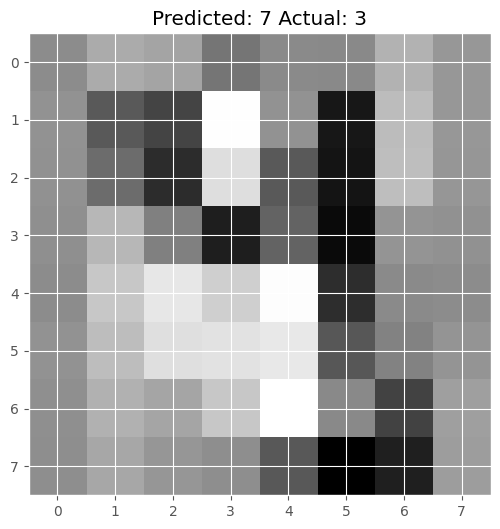

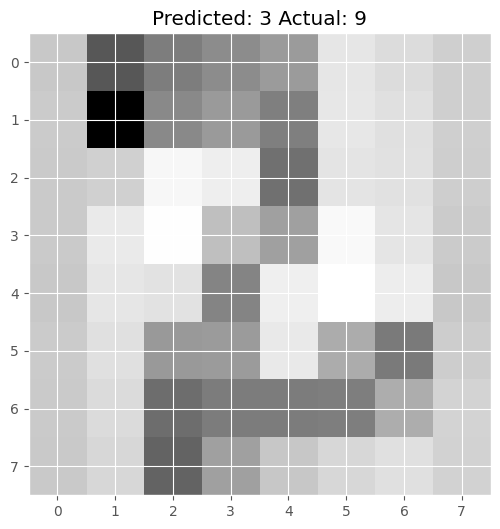

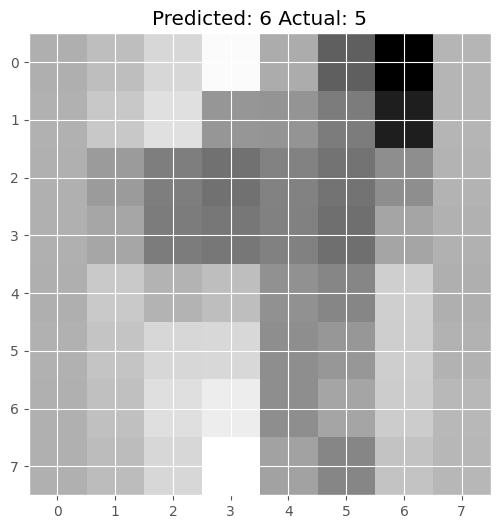

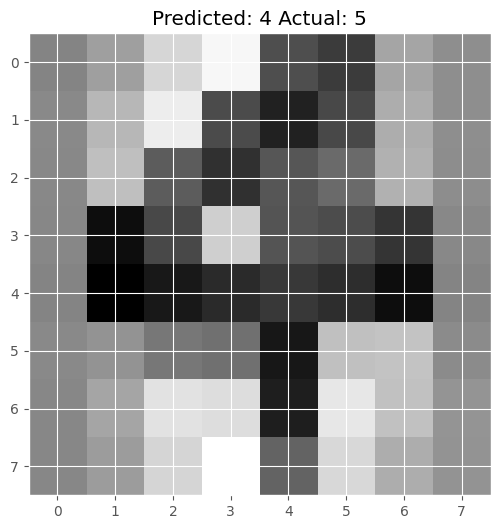

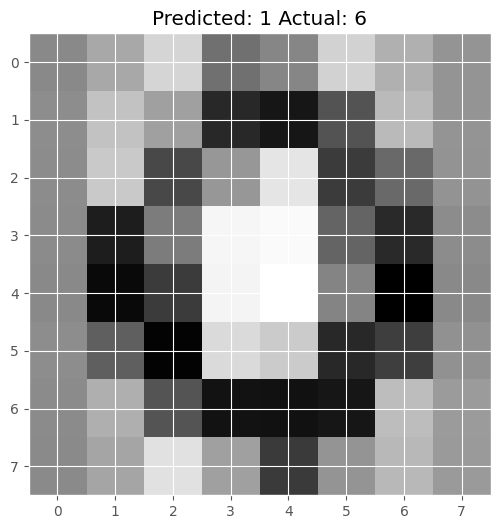

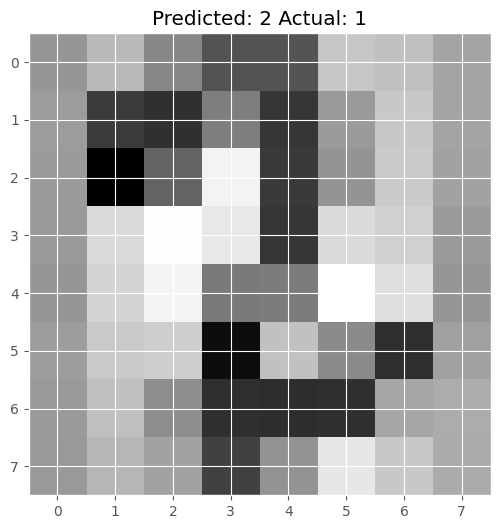

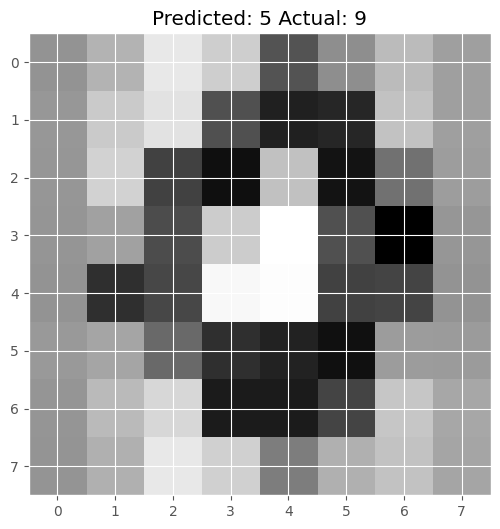

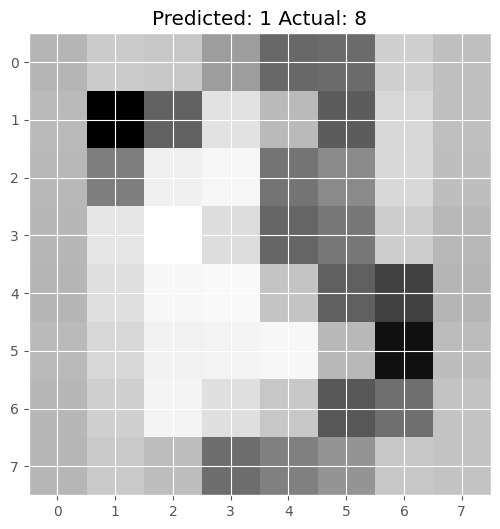

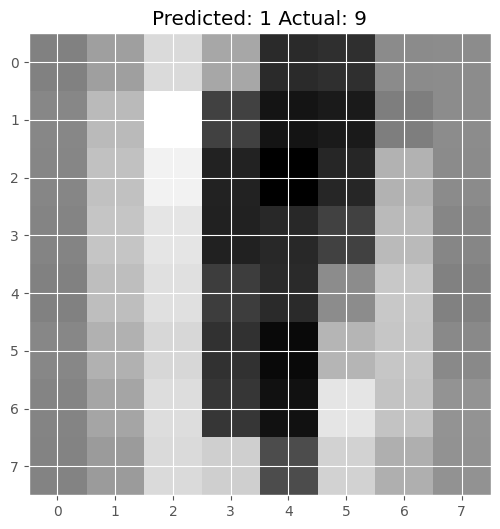

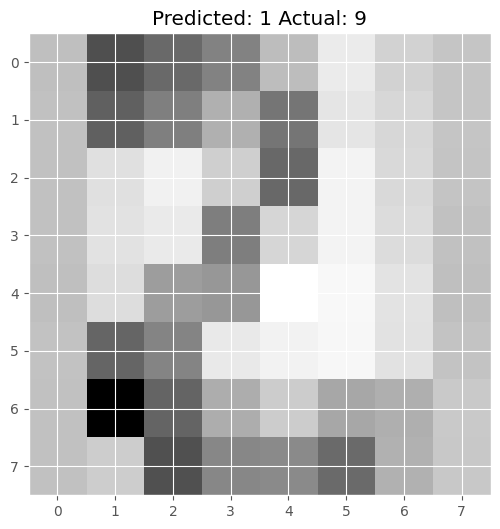

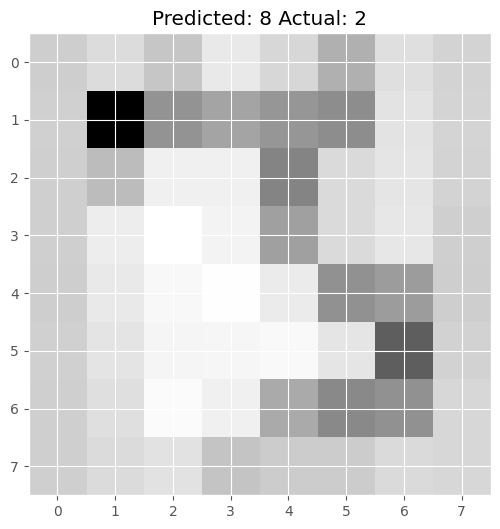

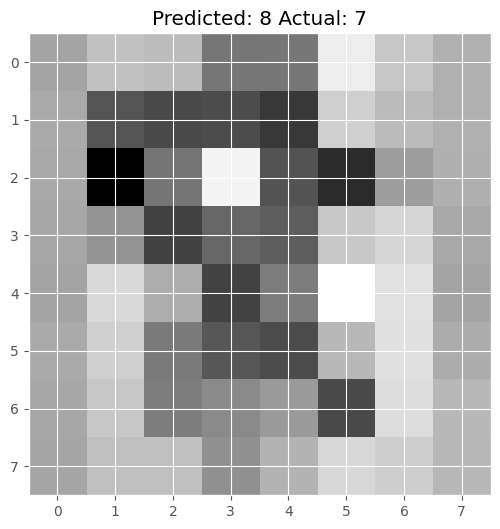

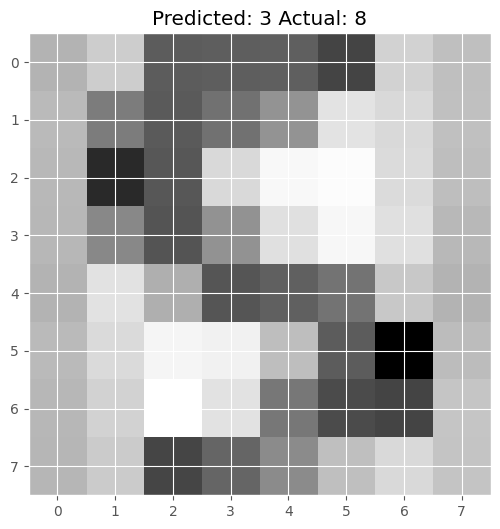

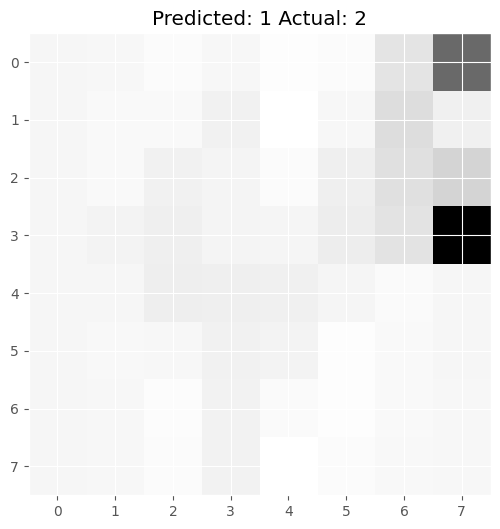

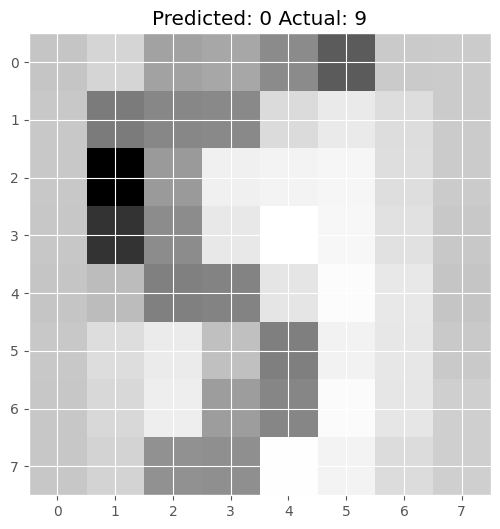

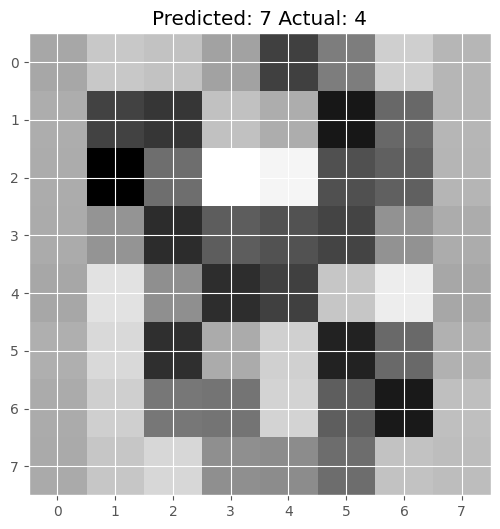

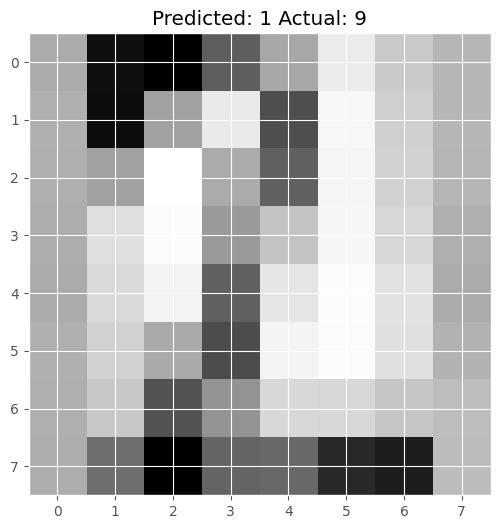

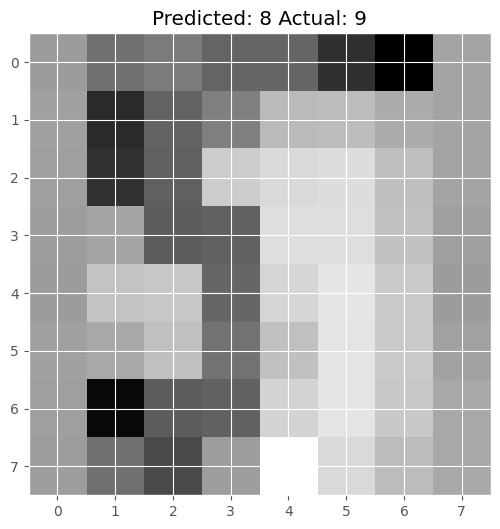

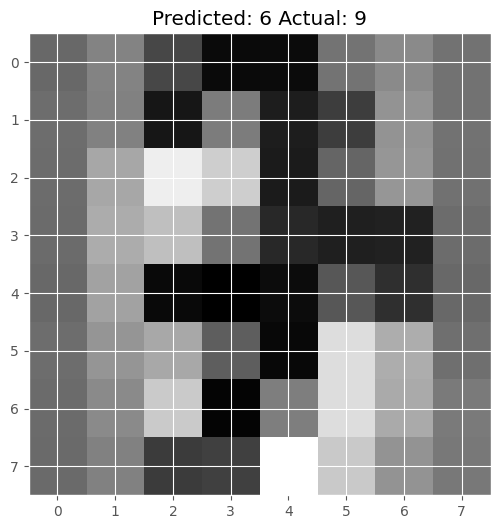

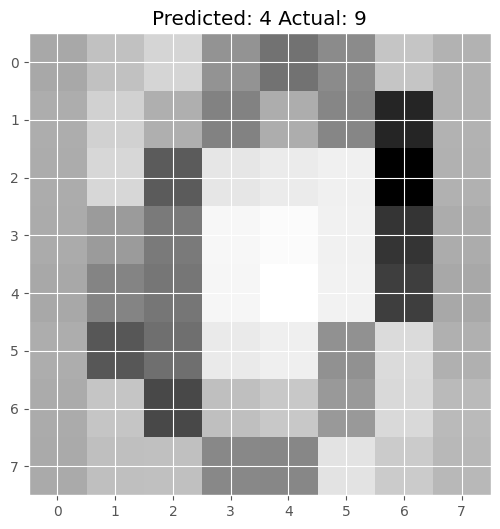

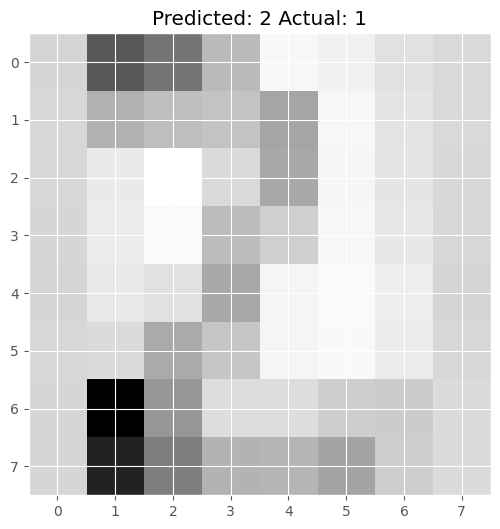

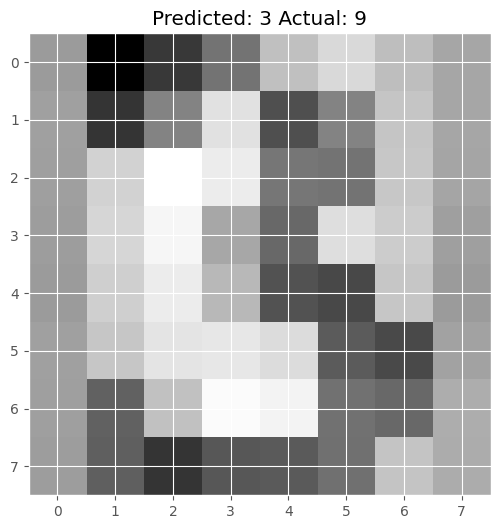

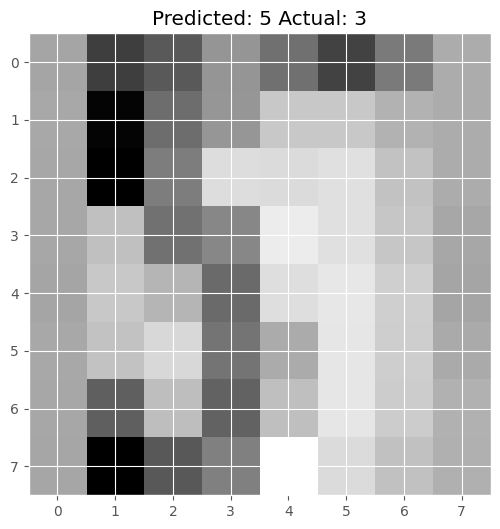

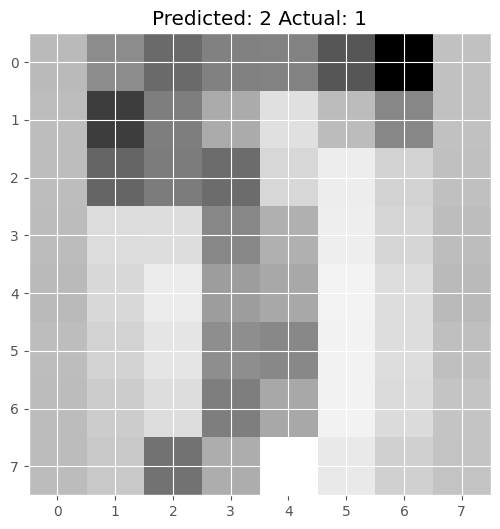

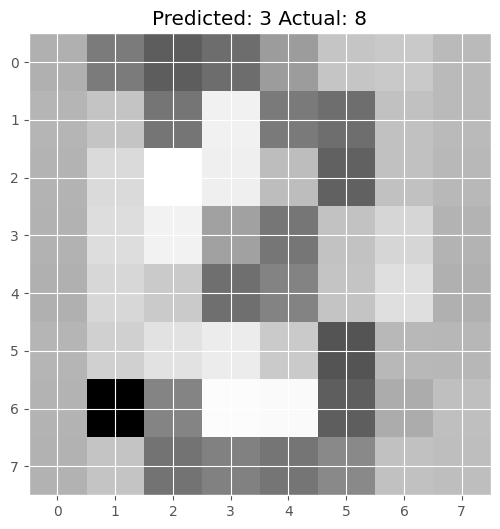

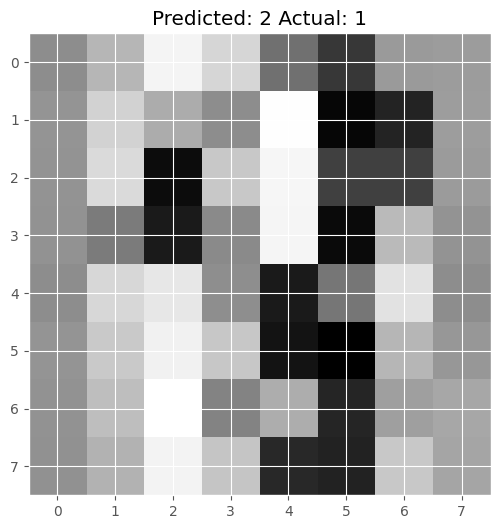

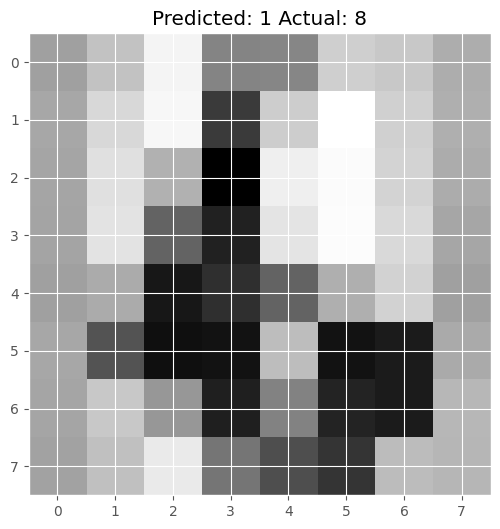

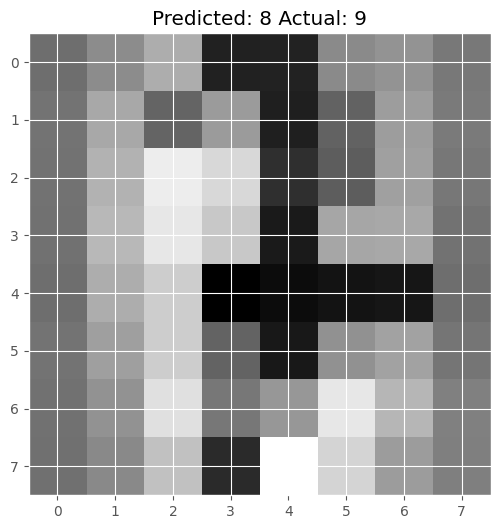

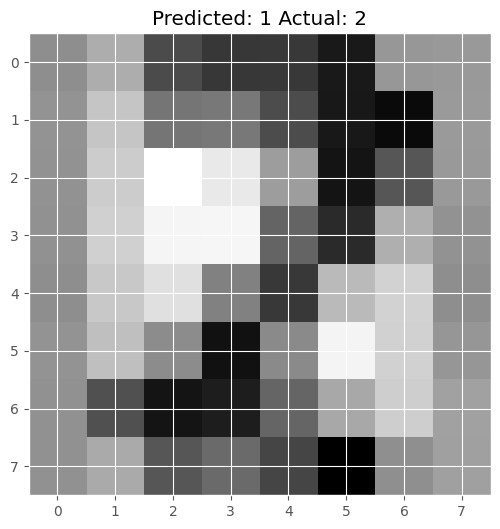

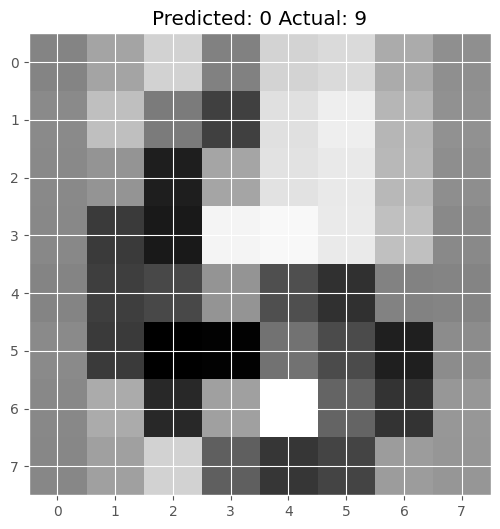

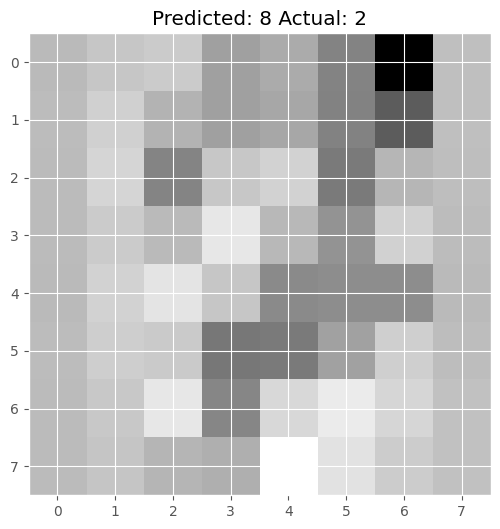

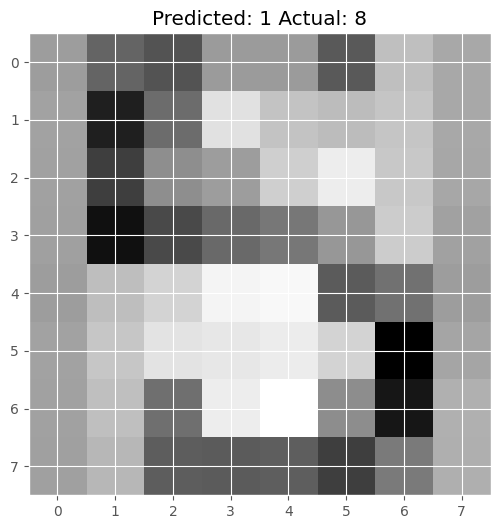

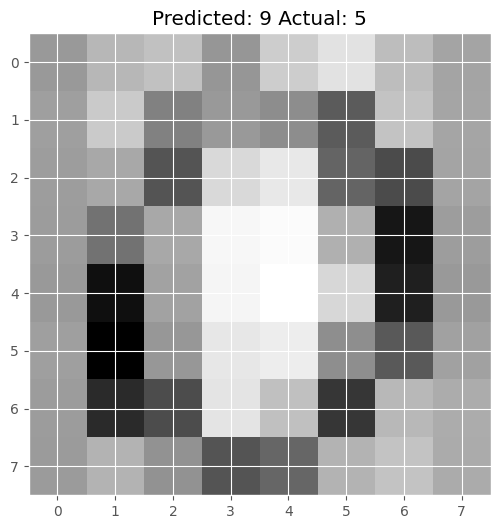

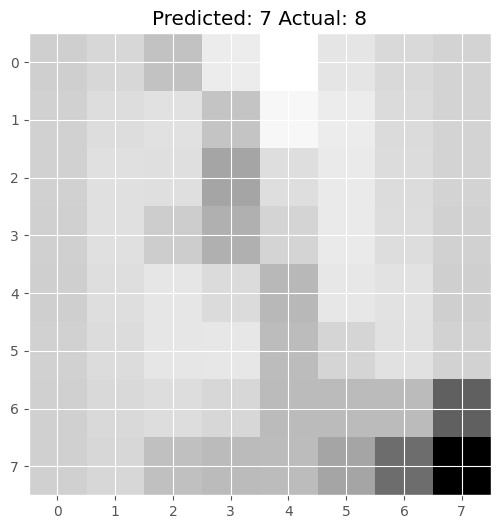

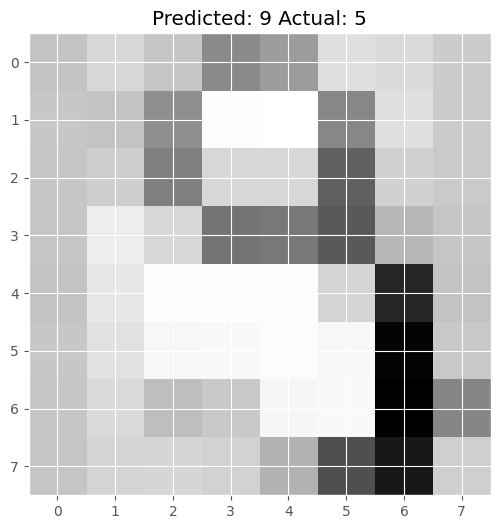

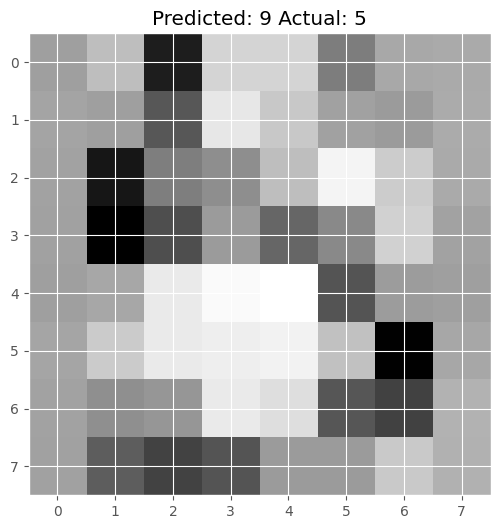

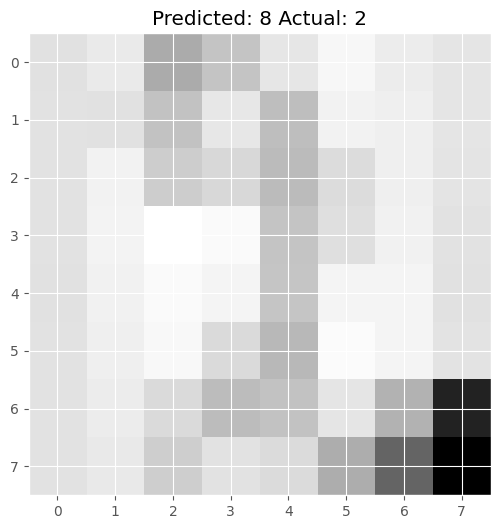

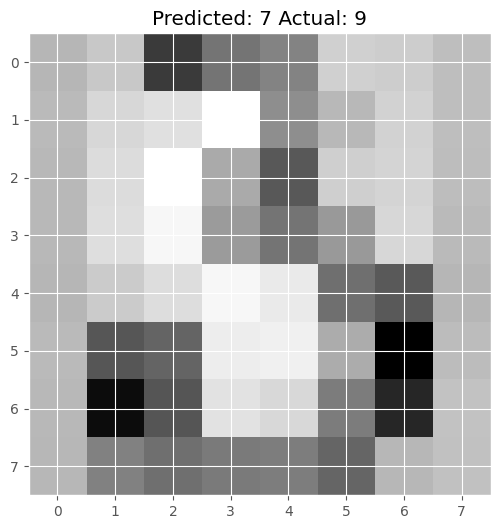

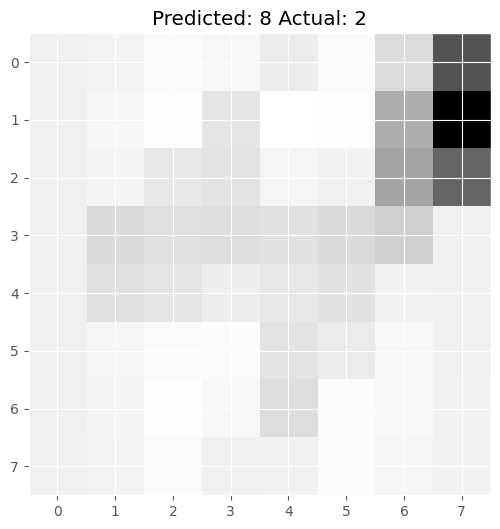

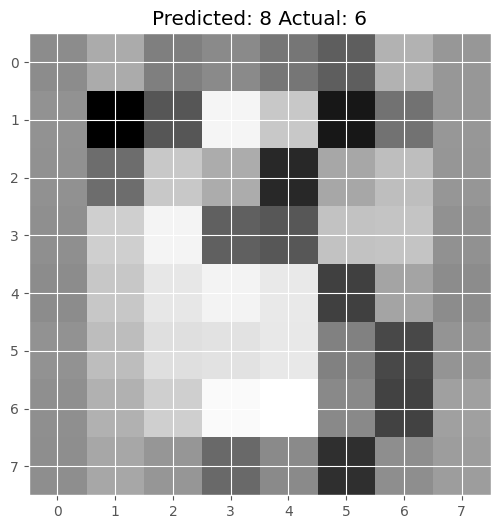

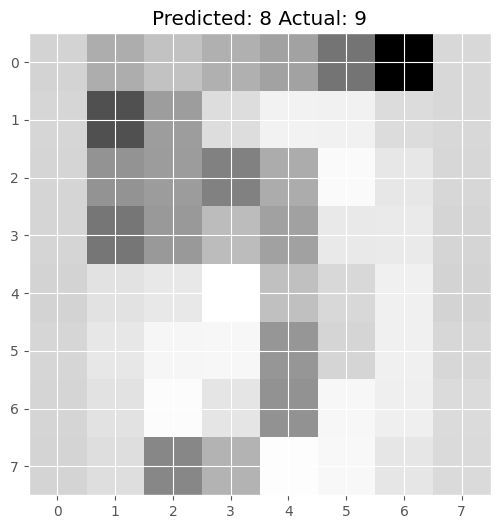

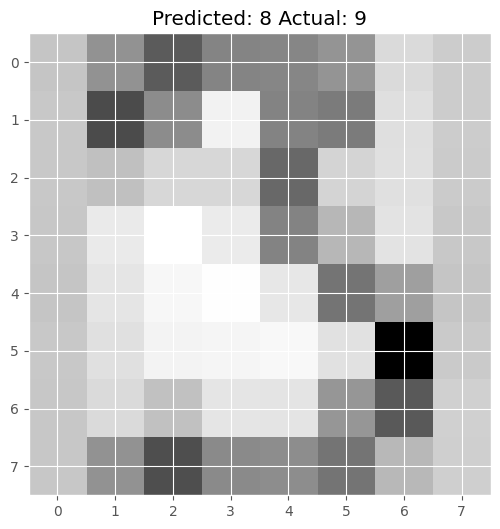

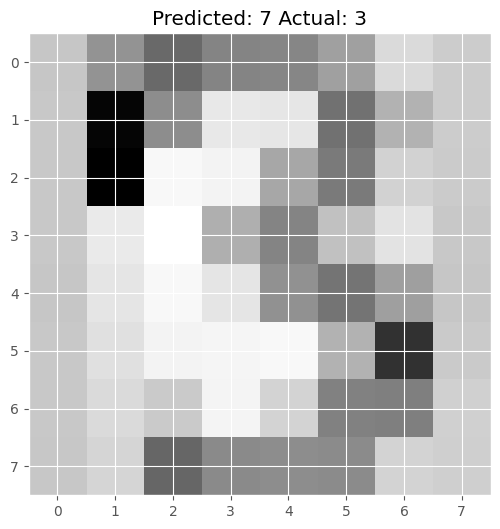

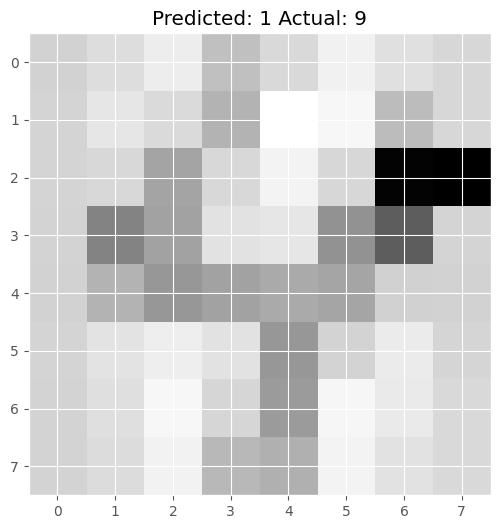

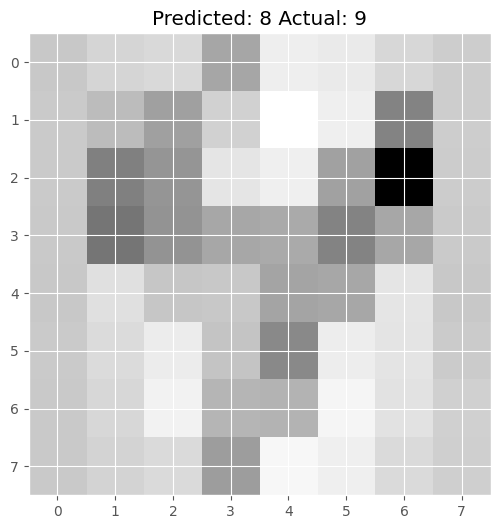

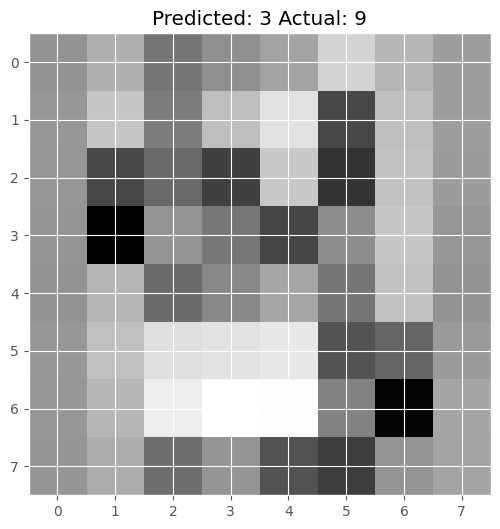

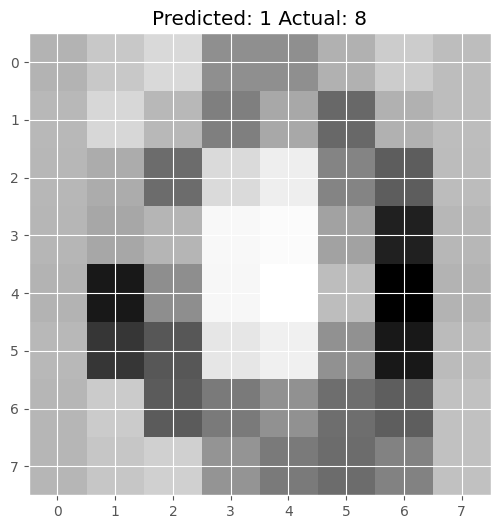

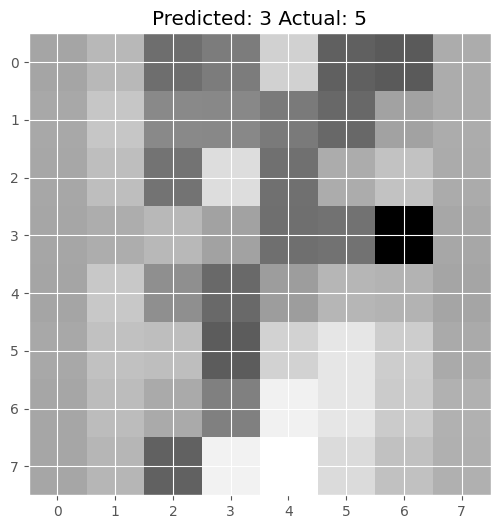

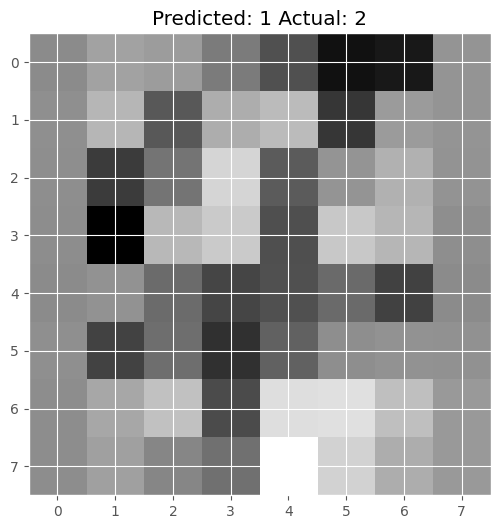

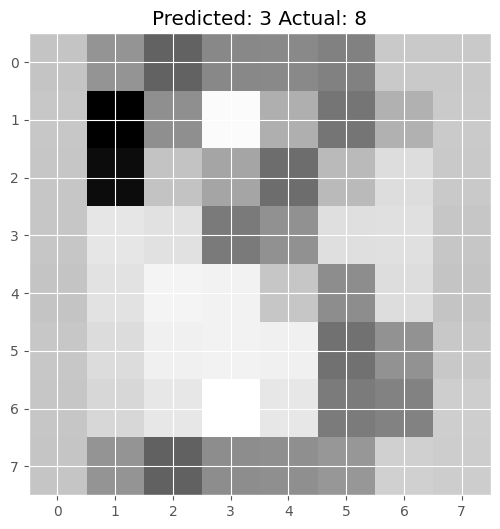

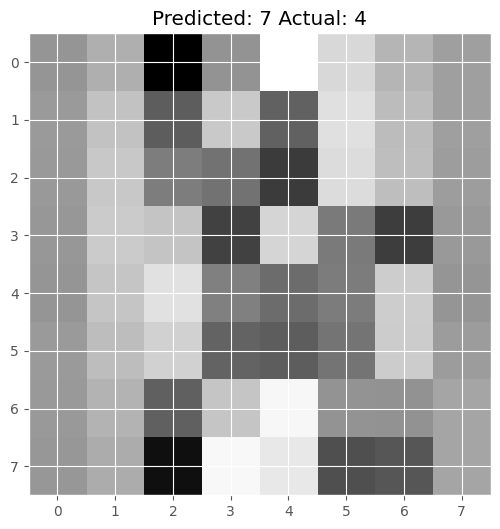

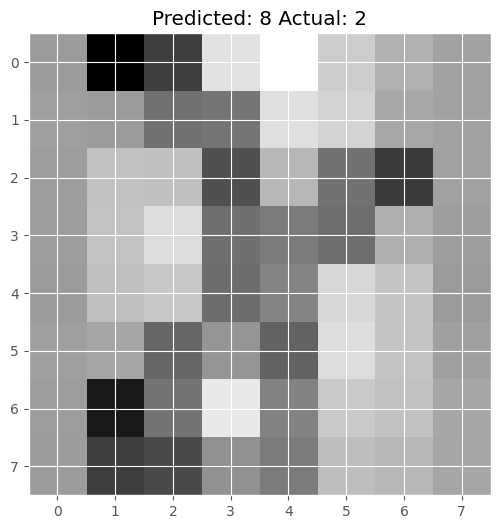

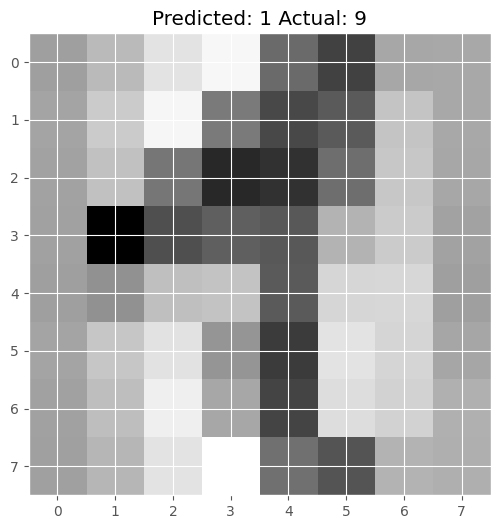

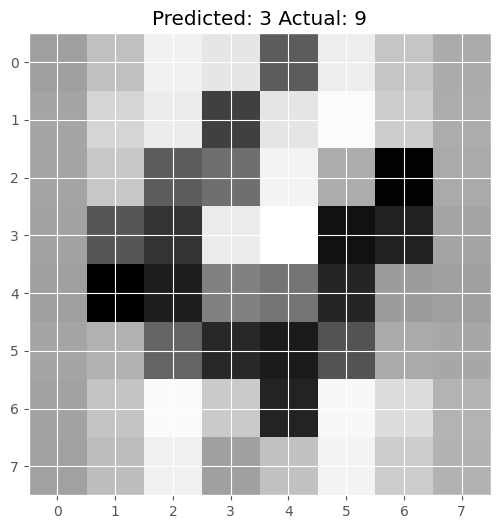

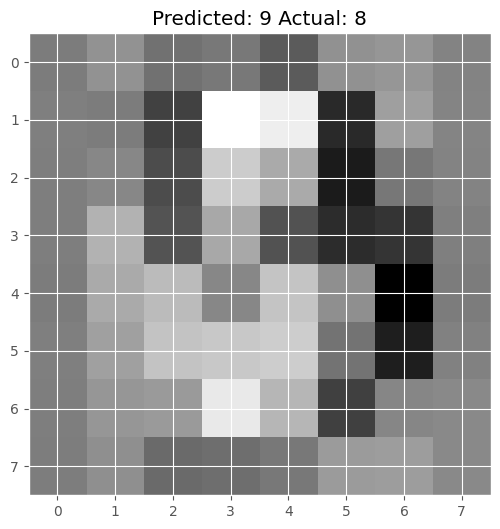

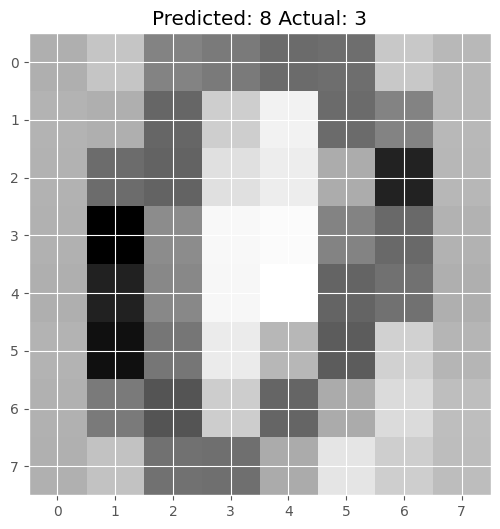

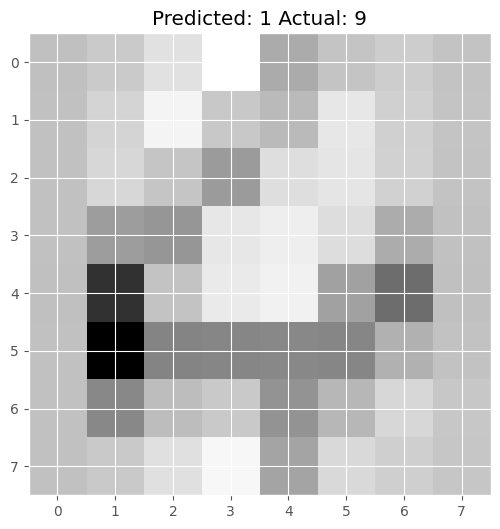

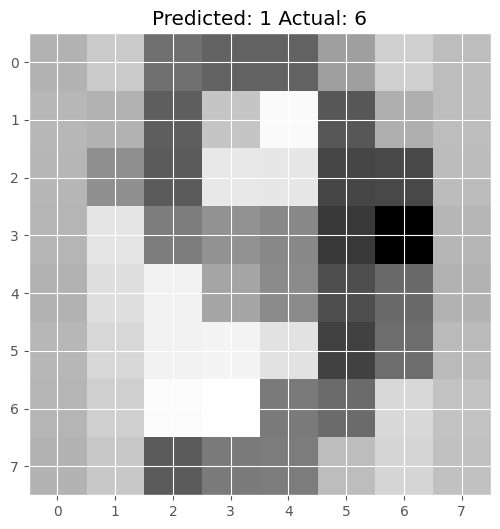

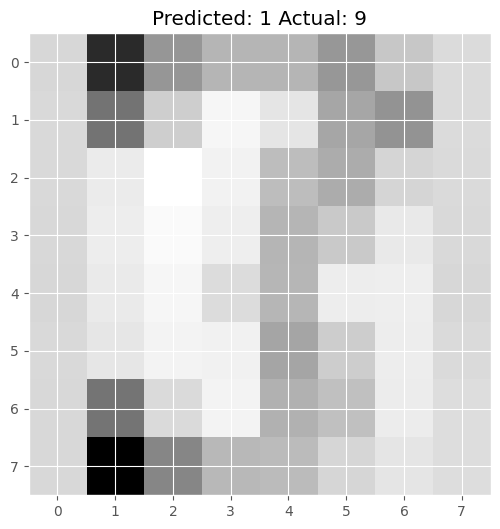

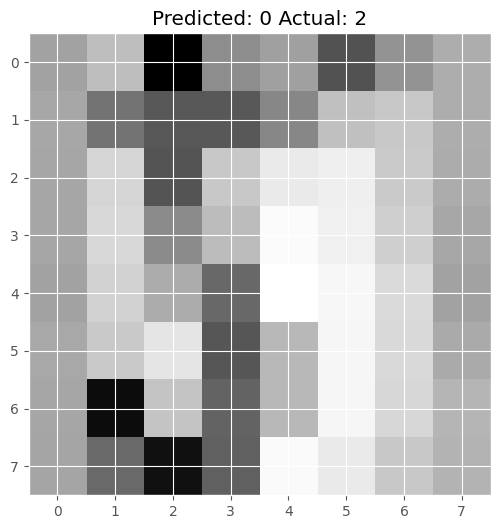

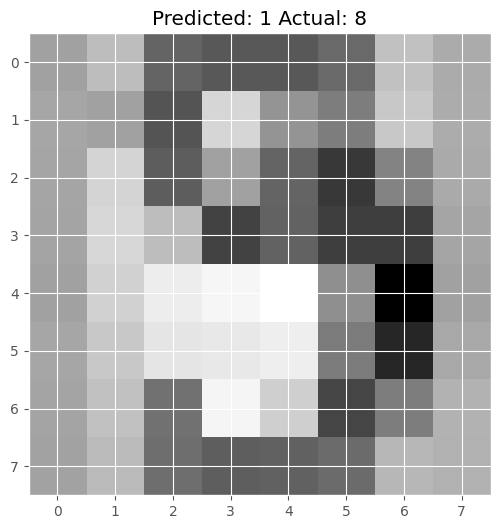

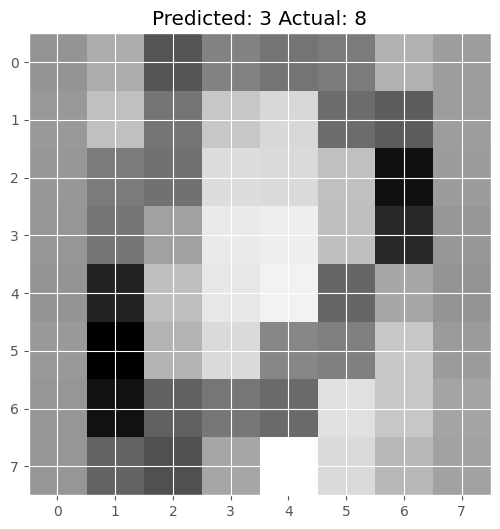

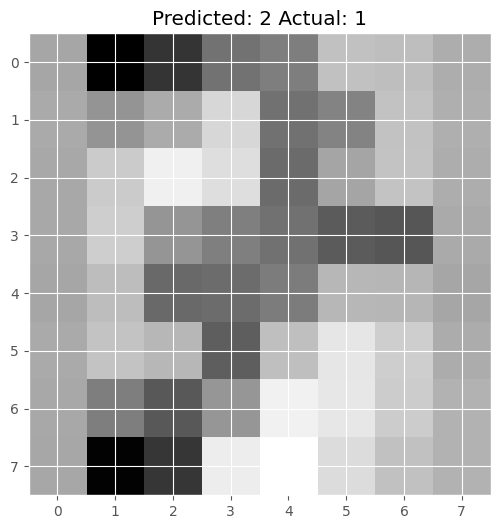

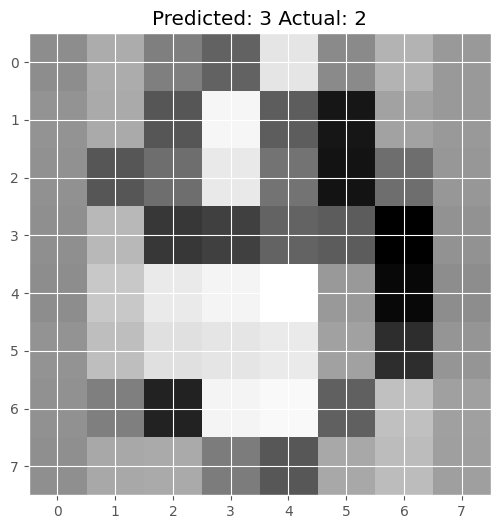

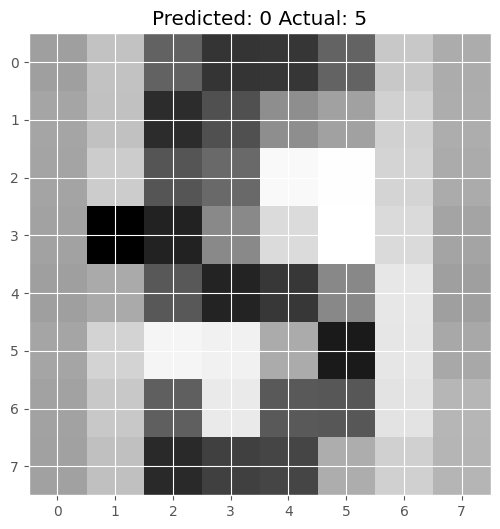

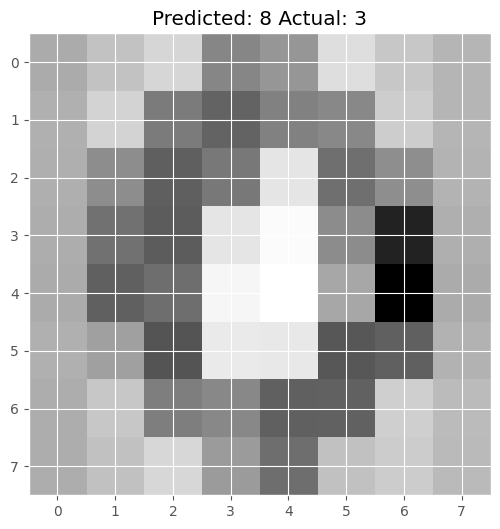

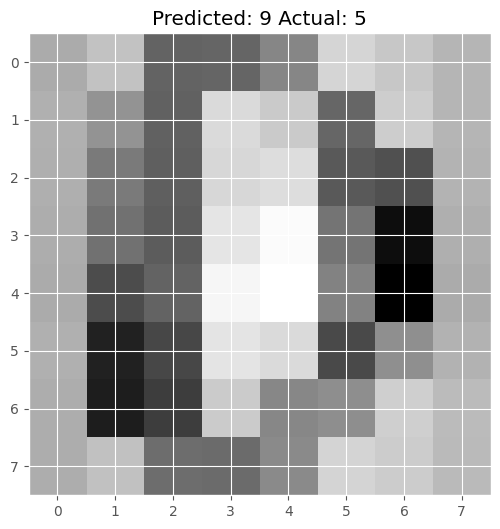

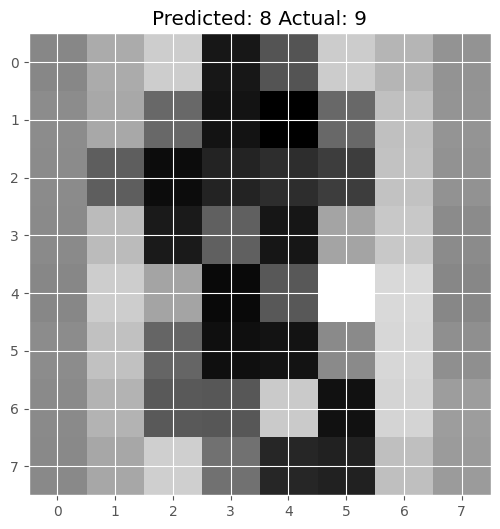

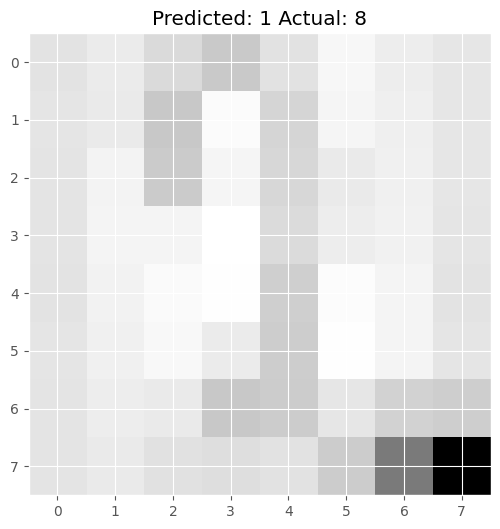

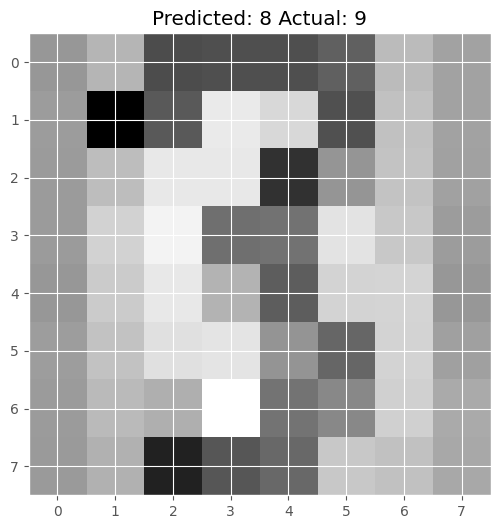

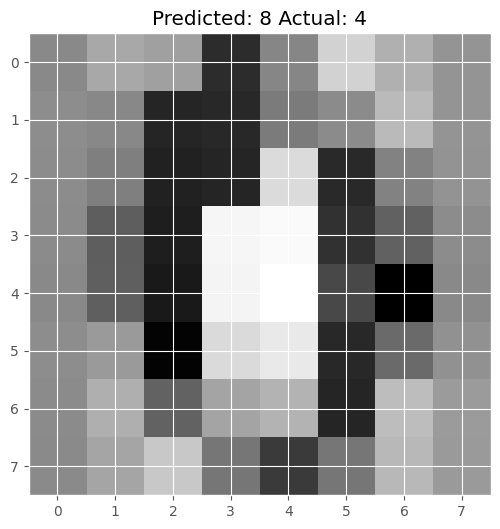

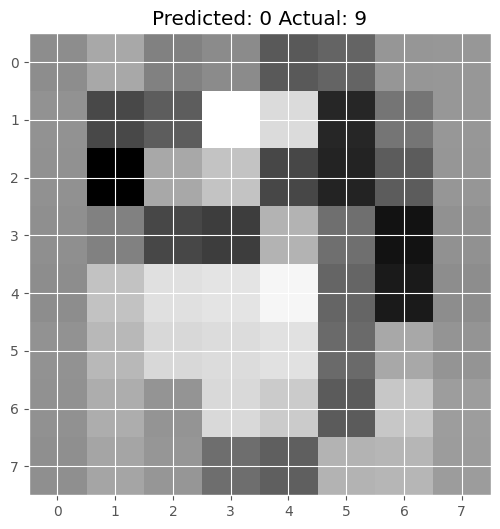

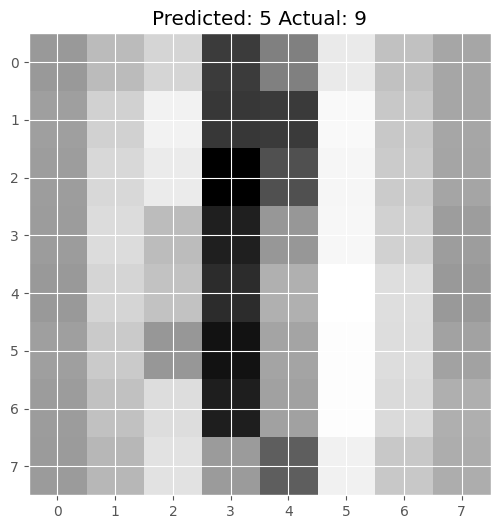

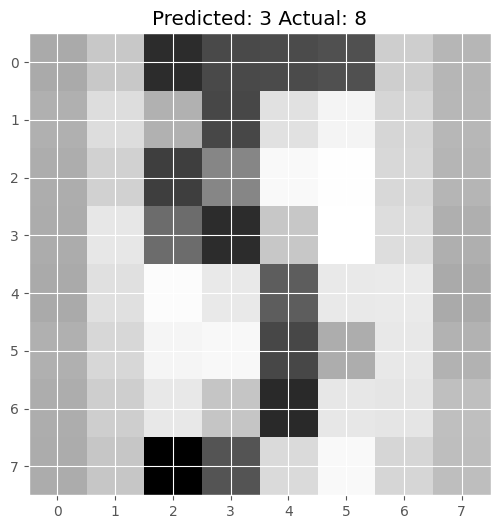

In [16]:
for i in range(y_pred.size):
    if y_pred[i] != y_test[i]:
        plt.imshow( np.reshape( X[i,:], (8,8) ), cmap='Greys', interpolation='nearest' )
        plt.title("Predicted: " + str(y_pred[i]) + " Actual: " + str(y_test[i]))
        plt.show()

Text(0, 0.5, 'CV score')

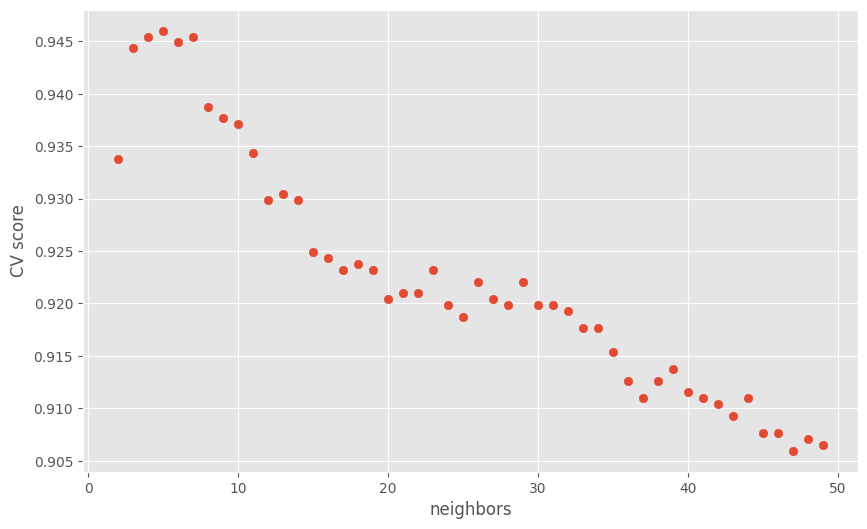

In [17]:
xs = []
ys = []
for k in range(2, 50):
    model = KNeighborsClassifier(n_neighbors = k)
    _ = model.fit(X_train, y_train)
    ys.append(cross_val_score(model, X, y, cv = 3).mean())
    xs.append(k)
    
plt.scatter(xs, ys)
plt.xlabel("neighbors")
plt.ylabel("CV score")

In [18]:
print(max(ys))
print(xs[ys.index(max(ys))])

0.9460211463550362
5


best model for KNN classification seems to be at 5 neighbors, which gives a CV score of about .946

In [19]:
model = KNeighborsClassifier(n_neighbors = 10)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=1, test_size=0.8 )
_ = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report( y_test, y_pred))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 146   0   1   1   1   0   0   0   0]
 [  2   3 128   0   0   0   0   2   7   0]
 [  0   0   0 135   0   2   0   6   3   1]
 [  0   0   0   0 150   0   0   2   0   0]
 [  0   0   0   3   1 139   1   0   0   3]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 140   0   0]
 [  0   6   2   4   0   1   0   1 117   2]
 [  2   8   0   6   0   3   0   9   3 121]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       130
           1       0.89      0.98      0.93       149
           2       0.98      0.90      0.94       142
           3       0.91      0.92      0.91       147
           4       0.99      0.99      0.99       152
           5       0.95      0.95      0.95       147
           6       0.99      0.99      0.99       146
           7       0.88      1.00      0.93       140
           8       0.89      0.88      0.89       133
           9       0.95     

accuracy goes up from 91% to 94%

# Task 2.1

In [20]:
df = pd.read_csv("OnlineNewsPopularity.csv")
shares = df.loc[:, ' shares'].to_numpy()
df = df.loc[:, df.columns != 'url']
X = df.loc[:, df.columns != ' shares'].to_numpy()

y = np.ones(shares.shape)
med = np.median(shares)
for i in range(shares.size):
    if(shares[i] < med):
        y[i] = 0

display(df)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


# Task 2.2

In [21]:
print("min: ", np.min(shares))
print("med: ", np.median(shares))
print("max: ", np.max(shares))

min:  1
med:  1400.0
max:  843300


# Task 2.3

Text(0, 0.5, 'CV score')

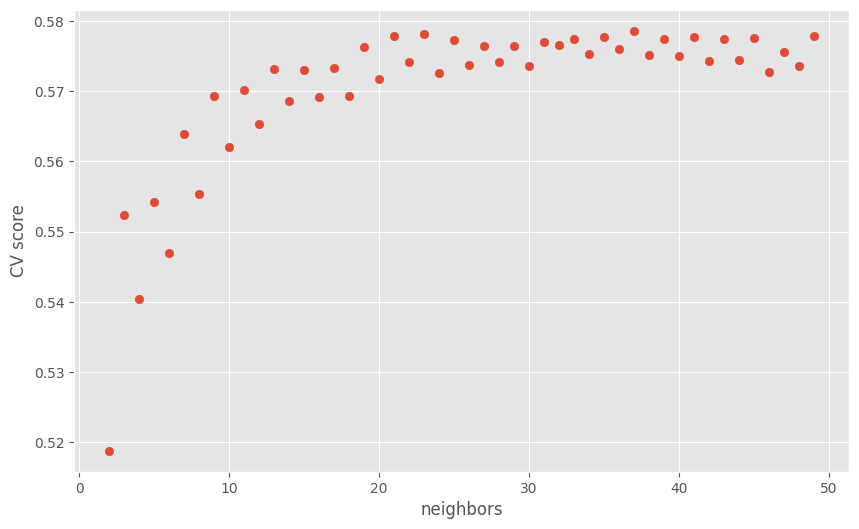

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=1, test_size=0.8 )

xs = []
ys = []
for k in range(2, 50):
    model = KNeighborsClassifier(n_neighbors = k)
    _ = model.fit(X_train, y_train)
    ys.append(cross_val_score(model, X, y, cv = 3).mean())
    xs.append(k)
    
plt.scatter(xs, ys)
plt.xlabel("neighbors")
plt.ylabel("CV score")

In [23]:
print(ys.index(max(ys)))
print(max(ys))
print(xs[35])

35
0.5786246898389851
37


best model for KNN classification seems to be at 37 neighbors, which gives a CV score of .5786

# Task 2.4

100%|██████████| 9/9 [12:19<00:00, 82.16s/it]


Text(0, 0.5, 'CV score')

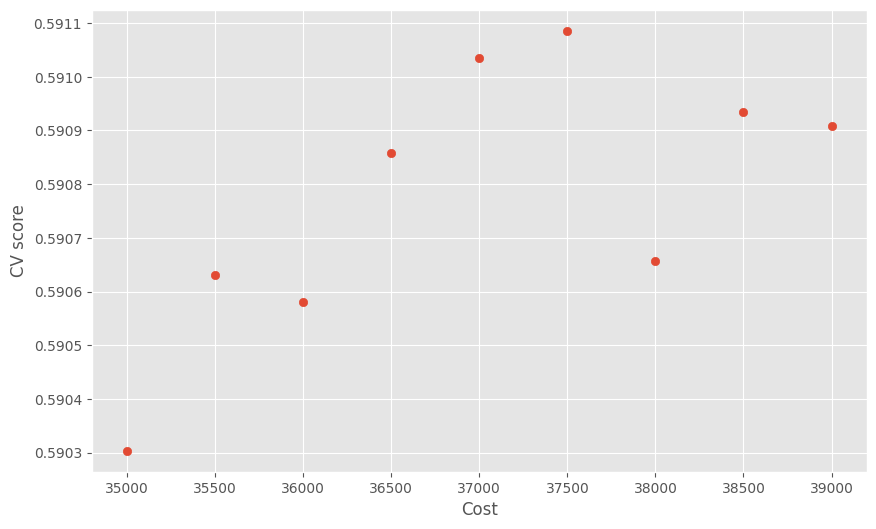

In [37]:
from tqdm import tqdm
xs = []
ys = []

for c in tqdm(range(35000, 39001, 500)):
    model = svm.SVC( kernel='rbf', C=float(c)/10 )
    _ = model.fit(X_train, y_train)
    ys.append(cross_val_score(model, X, y, cv = 2).mean())
    xs.append( c )


plt.scatter(xs, ys)
plt.xlabel("Cost")
plt.ylabel("CV score")

In [38]:
print(max(ys))
print(xs[ys.index(max(ys))])



0.5910856623953183
37500


best model for SVM classification seems to be at around cost = 37500, which gives a CV score of .5911

# Task 2.5

100%|██████████| 12/12 [17:18<00:00, 86.54s/it]


Text(0, 0.5, 'CV score')

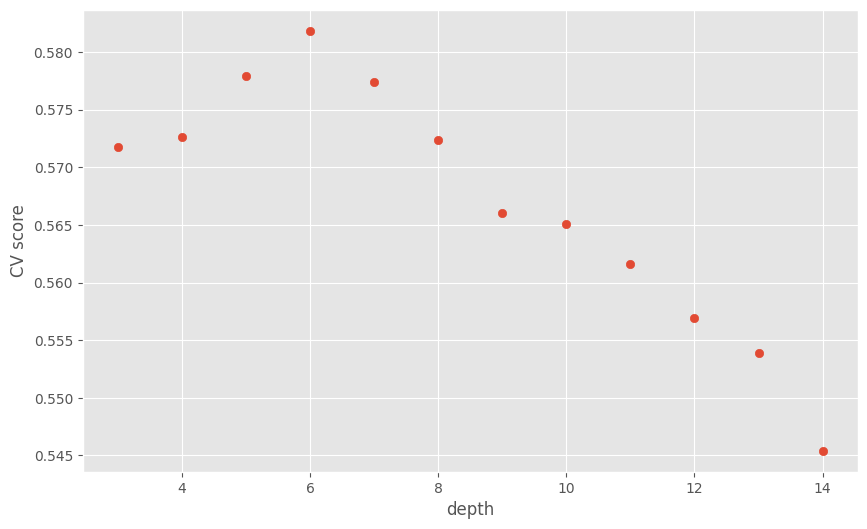

In [26]:
xs = []
ys = []

numSamples = 1000

X2 = X[:numSamples]
y2 = y[:numSamples]

X_train2 = X_train[:numSamples]
y_train2 = y_train[:numSamples]

for d in tqdm(range(3,15)):
    model = tree.DecisionTreeClassifier(max_depth=d)
    _ = model.fit(X_train, y_train)
    ys.append(cross_val_score(model, X, y, cv = 5).mean())
    xs.append( d )


plt.scatter(xs, ys)
plt.xlabel("depth")
plt.ylabel("CV score")

In [27]:
print(max(ys))
print(xs[ys.index(max(ys))])

0.5818505851439599
6


the best depth for the decision tree seems to be at depth 6, which gives a cv score of .5818

# task 2.6

1. SVM worked the best with a cv accuracy of .591
2. knn had the number of neighbors had a large influence on the accuracy, while SVM had a slightly smaller influence on the accuracy and depth of the decision tree had a much smaller influence on the accuracy than the other 2.
3. decision trees were the easiest to interpret becuase they are discrete values (unlike SVMs) and had less bounciness or noise than KNN did.
4. SVM is the most accurate, but the time to train the model is prohibitively expensive. Decision trees were extremely fast to train and had good accuracy while KNNs seemed to be better than SVMs but worse than Decission trees.